This notebook combines two datasets: one containing internal information and the other providing external data. Together, these datasets offer a comprehensive view of consumers' financial history, including past loan applications, demographic details, and repayment behaviors.

The objective is to build a machine learning model to predict loan eligibility for consumers. This is formulated as a multiclass classification problem, where each consumer is assigned to a specific risk category, indicating their chances of getting loan approval

# Understanding the data:

1a. Check the size of the dataset. Both in terms of the numbers of rows and columns and also memory usage </br>
1b. Check for missing data and decide how to handle missing values </br>
1c. Check data types and ensure that the columns have the appropriate data type. Also check that the values wihtin each column align with the expected range of values in that column </br>
1d. Generate summary statistics (e.g., mean, median, standard deviation) to understand the distribution of the data</br>
1e. Examine the distribution of the target variable

In [454]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from scipy.stats import f_oneway
from scipy import stats

from scipy.stats.mstats import winsorize

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [353]:
internal= pd.read_excel('data/case_study1.xlsx')

In [354]:
external= pd.read_excel('data/case_study2.xlsx')

In [355]:
df1= internal.copy()
df2= external.copy()

In [356]:
df1.head()
df1.tail()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,Auto_TL,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,5,4,1,0,0,0.000,0.0,0.200,0.800,0,0,0.00,0.0,0,0,0,0,1,0,4,1,4,0,72,18
1,2,1,0,1,0,0,0.000,0.0,1.000,0.000,1,0,1.00,0.0,0,0,0,1,0,0,0,0,1,0,7,7
2,3,8,0,8,1,0,0.125,0.0,1.000,0.000,2,0,0.25,0.0,1,1,0,6,1,0,0,2,6,0,47,2
3,4,1,0,1,1,0,1.000,0.0,1.000,0.000,1,0,1.00,0.0,1,0,0,0,0,0,0,0,1,1,5,5
4,5,3,2,1,0,0,0.000,0.0,0.333,0.667,0,0,0.00,0.0,0,1,0,0,0,0,0,3,0,2,131,32


,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,Auto_TL,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
51331,51332,3,0,3,1,0,0.333,0.00,1.0,0.0,1,0,0.333,0.00,0,0,0,2,0,0,0,0,3,1,24,5
51332,51333,4,2,2,0,1,0.000,0.25,0.5,0.5,2,1,0.500,0.25,0,2,0,2,0,0,0,2,2,0,74,7
51333,51334,2,1,1,1,1,0.500,0.50,0.5,0.5,2,1,1.000,0.50,0,0,0,2,0,0,0,0,2,0,9,5
51334,51335,2,1,1,0,0,0.000,0.00,0.5,0.5,1,1,0.500,0.50,0,0,0,2,0,0,0,0,2,0,15,8
51335,51336,1,0,1,0,0,0.000,0.00,1.0,0.0,0,0,0.000,0.00,0,1,0,0,0,0,0,1,0,0,20,20


In [357]:
df2.head()
df2.tail()

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,max_deliq_6mts,max_deliq_12mts,num_times_30p_dpd,num_times_60p_dpd,num_std,num_std_6mts,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_6mts,num_dbt_12mts,num_lss,num_lss_6mts,num_lss_12mts,recent_level_of_deliq,tot_enq,CC_enq,CC_enq_L6m,CC_enq_L12m,PL_enq,PL_enq_L6m,PL_enq_L12m,time_since_recent_enq,enq_L12m,enq_L6m,enq_L3m,MARITALSTATUS,EDUCATION,AGE,GENDER,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_opened_TLs_L6m_of_L12m,pct_currentBal_all_TL,CC_utilization,CC_Flag,PL_utilization,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,549,35,15,11,29,29,0,0,0,-99999,-99999,0,0,21,5,11,0,0,0,0,0,0,0,0,0,29,6,0,0,0,6,0,0,566,0,0,0,Married,12TH,48,M,51000,114,0.200,0.0,0.798,-99999.0,0,0.798,1,0.0,0.0,0.0,0.0,13.333,1,0,PL,PL,696,P2
1,2,47,-99999,-99999,0,-99999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,209,1,0,0,Single,GRADUATE,23,F,19000,50,1.000,0.0,0.370,-99999.0,0,-99999.000,0,0.0,0.0,0.0,0.0,0.860,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,302,11,3,9,25,25,1,9,8,25,25,0,0,10,5,10,0,0,0,0,0,0,0,0,0,25,4,0,0,0,0,0,0,587,0,0,0,Married,SSC,40,M,18,191,1.000,0.5,0.585,-99999.0,0,-99999.000,0,0.0,0.0,0.0,0.0,5741.667,1,0,ConsumerLoan,others,693,P2
3,4,-99999,-99999,-99999,0,-99999,0,0,0,0,-99999,-99999,0,0,5,4,5,0,0,0,0,0,0,0,0,0,0,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,Married,SSC,34,M,10000,246,1.000,1.0,0.990,-99999.0,0,-99999.000,0,0.0,0.0,0.0,0.0,9.900,0,0,others,others,673,P2
4,5,583,-99999,-99999,0,-99999,0,0,0,0,-99999,-99999,0,0,53,4,16,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3951,0,0,0,Married,POST-GRADUATE,48,M,15000,75,0.333,0.0,0.000,-99999.0,0,-99999.000,0,0.0,0.0,0.0,0.0,-99999.000,0,0,AL,AL,753,P1


,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,max_deliq_6mts,max_deliq_12mts,num_times_30p_dpd,num_times_60p_dpd,num_std,num_std_6mts,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_6mts,num_dbt_12mts,num_lss,num_lss_6mts,num_lss_12mts,recent_level_of_deliq,tot_enq,CC_enq,CC_enq_L6m,CC_enq_L12m,PL_enq,PL_enq_L6m,PL_enq_L12m,time_since_recent_enq,enq_L12m,enq_L6m,enq_L3m,MARITALSTATUS,EDUCATION,AGE,GENDER,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_opened_TLs_L6m_of_L12m,pct_currentBal_all_TL,CC_utilization,CC_Flag,PL_utilization,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
51331,51332,15,24,23,2,24,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,4,0,0,0,0,0,0,0,3,3,1,Married,12TH,43,M,18500,249,1.0,1.0,0.230,-99999.0,0,-99999.0,0,0.0,0.0,0.0,0.0,1.661,0,0,ConsumerLoan,ConsumerLoan,650,P4
51332,51333,57,-99999,-99999,0,-99999,0,0,0,0,0,0,0,0,6,4,6,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,203,1,0,0,Married,SSC,31,M,25000,186,0.5,0.0,0.660,-99999.0,0,-99999.0,0,0.0,0.0,0.0,0.0,0.520,0,0,others,others,702,P1
51333,51334,32,-99999,-99999,0,-99999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,2,2,2,1,5,4,2,Married,SSC,28,M,18000,66,0.5,0.5,0.428,-99999.0,0,-99999.0,0,1.0,0.0,1.0,0.0,0.567,0,0,ConsumerLoan,others,661,P3
51334,51335,58,-99999,-99999,0,-99999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,242,1,0,0,Single,UNDER GRADUATE,25,F,12802,54,0.5,0.0,0.143,-99999.0,0,-99999.0,0,0.0,0.0,0.0,0.0,1.202,0,0,ConsumerLoan,others,686,P2
51335,51336,74,-99999,-99999,0,-99999,0,0,0,0,-99999,-99999,0,0,18,4,10,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,13,1,1,1,Married,SSC,25,M,16000,102,1.0,0.0,0.333,-99999.0,0,-99999.0,0,0.0,0.0,0.0,0.0,-99999.000,0,0,others,others,681,P2


In [358]:
df1.shape
df2.shape

(51336, 26)

(51336, 62)

In [359]:
df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PROSPECTID            51336 non-null  int64  
 1   Total_TL              51336 non-null  int64  
 2   Tot_Closed_TL         51336 non-null  int64  
 3   Tot_Active_TL         51336 non-null  int64  
 4   Total_TL_opened_L6M   51336 non-null  int64  
 5   Tot_TL_closed_L6M     51336 non-null  int64  
 6   pct_tl_open_L6M       51336 non-null  float64
 7   pct_tl_closed_L6M     51336 non-null  float64
 8   pct_active_tl         51336 non-null  float64
 9   pct_closed_tl         51336 non-null  float64
 10  Total_TL_opened_L12M  51336 non-null  int64  
 11  Tot_TL_closed_L12M    51336 non-null  int64  
 12  pct_tl_open_L12M      51336 non-null  float64
 13  pct_tl_closed_L12M    51336 non-null  float64
 14  Tot_Missed_Pmnt       51336 non-null  int64  
 15  Auto_TL            

In [360]:
# Get deep memory usage (including objects) unit in bytes
deep_memory_usage_df1 = df1.memory_usage(deep=True).sum()
deep_memory_usage_df2 = df2.memory_usage(deep=True).sum()
print(deep_memory_usage_df1)
print(deep_memory_usage_df2)

10678016
42098866


First, let's explore the internal data present in df1

In [361]:
df1.isnull().sum()

PROSPECTID              0
Total_TL                0
Tot_Closed_TL           0
Tot_Active_TL           0
Total_TL_opened_L6M     0
Tot_TL_closed_L6M       0
pct_tl_open_L6M         0
pct_tl_closed_L6M       0
pct_active_tl           0
pct_closed_tl           0
Total_TL_opened_L12M    0
Tot_TL_closed_L12M      0
pct_tl_open_L12M        0
pct_tl_closed_L12M      0
Tot_Missed_Pmnt         0
Auto_TL                 0
CC_TL                   0
Consumer_TL             0
Gold_TL                 0
Home_TL                 0
PL_TL                   0
Secured_TL              0
Unsecured_TL            0
Other_TL                0
Age_Oldest_TL           0
Age_Newest_TL           0
dtype: int64

In [362]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PROSPECTID,51336.0,25668.500000,14819.571046,1.0,12834.75,25668.500,38502.250,51336.0
Total_TL,51336.0,4.858598,7.177116,1.0,1.00,2.000,5.000,235.0
Tot_Closed_TL,51336.0,2.770415,5.941680,0.0,0.00,1.000,3.000,216.0
Tot_Active_TL,51336.0,2.088184,2.290774,0.0,1.00,1.000,3.000,47.0
Total_TL_opened_L6M,51336.0,0.736754,1.296717,0.0,0.00,0.000,1.000,27.0
Tot_TL_closed_L6M,51336.0,0.428919,0.989972,0.0,0.00,0.000,1.000,19.0
pct_tl_open_L6M,51336.0,0.184574,0.297414,0.0,0.00,0.000,0.308,1.0
pct_tl_closed_L6M,51336.0,0.089095,0.205635,0.0,0.00,0.000,0.053,1.0
pct_active_tl,51336.0,0.577542,0.379867,0.0,0.25,0.556,1.000,1.0
pct_closed_tl,51336.0,0.422458,0.379867,0.0,0.00,0.444,0.750,1.0


Now, let's take a look at the internal dataset

In [363]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 62 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PROSPECTID                    51336 non-null  int64  
 1   time_since_recent_payment     51336 non-null  int64  
 2   time_since_first_deliquency   51336 non-null  int64  
 3   time_since_recent_deliquency  51336 non-null  int64  
 4   num_times_delinquent          51336 non-null  int64  
 5   max_delinquency_level         51336 non-null  int64  
 6   max_recent_level_of_deliq     51336 non-null  int64  
 7   num_deliq_6mts                51336 non-null  int64  
 8   num_deliq_12mts               51336 non-null  int64  
 9   num_deliq_6_12mts             51336 non-null  int64  
 10  max_deliq_6mts                51336 non-null  int64  
 11  max_deliq_12mts               51336 non-null  int64  
 12  num_times_30p_dpd             51336 non-null  int64  
 13  n

In [364]:
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PROSPECTID,51336.0,25668.500000,14819.571046,1.0,12834.750,25668.500,38502.25000,51336.000
time_since_recent_payment,51336.0,-8129.961314,27749.328514,-99999.0,46.000,70.000,161.00000,6065.000
time_since_first_deliquency,51336.0,-70020.091320,45823.312757,-99999.0,-99999.000,-99999.000,8.00000,35.000
time_since_recent_deliquency,51336.0,-70022.375838,45819.820741,-99999.0,-99999.000,-99999.000,3.00000,35.000
num_times_delinquent,51336.0,1.573749,4.165012,0.0,0.000,0.000,1.00000,74.000
max_delinquency_level,51336.0,-70003.987085,45847.976100,-99999.0,-99999.000,-99999.000,15.00000,900.000
max_recent_level_of_deliq,51336.0,13.521953,53.336976,0.0,0.000,0.000,10.00000,900.000
num_deliq_6mts,51336.0,0.184977,0.710240,0.0,0.000,0.000,0.00000,12.000
num_deliq_12mts,51336.0,0.480053,1.522210,0.0,0.000,0.000,0.00000,28.000
num_deliq_6_12mts,51336.0,0.295076,1.027471,0.0,0.000,0.000,0.00000,20.000


# Preprocessing 

## Handling missing and erroneous values

In the external dataset `(df1)`, the columns `Age_Oldest_TL` and `Age_Newest_TL` contain invalid minimum values of -9999999, which do not represent meaningful data. As a result, these values will be replaced with NaN.

Next, we will calculate the proportion of occurrences of -9999 in each of these columns to further assess the data quality

In [365]:
error_prct_old = len(df1[df1.loc[:,'Age_Oldest_TL']==-99999])/len(df1)*100
print("The value -99999 exists in {error_prct_old}% percent of the Age of Oldest trade lines".format(error_prct_old=error_prct_old))

error_prct_new = len(df1[df1.loc[:,'Age_Newest_TL']==-99999])/len(df1)*100
print("The value -99999 exists in {error_prct_new}% percent of the Age of the newest trade lines".format(error_prct_new=error_prct_new))


The value -99999 exists in 0.07791803023219572% percent of the Age of Oldest trade lines
The value -99999 exists in 0.07791803023219572% percent of the Age of the newest trade lines


Since `-99999` occurs in only a small number of records, we can confidently remove those rows from the dataset without significantly impacting the overall data quality.

In [366]:
df1= df1.loc[(df1['Age_Oldest_TL'] != -99999)|(df1['Age_Newest_TL'] != -99999)]

In [367]:
df1.head()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,Auto_TL,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,5,4,1,0,0,0.000,0.0,0.200,0.800,0,0,0.00,0.0,0,0,0,0,1,0,4,1,4,0,72,18
1,2,1,0,1,0,0,0.000,0.0,1.000,0.000,1,0,1.00,0.0,0,0,0,1,0,0,0,0,1,0,7,7
2,3,8,0,8,1,0,0.125,0.0,1.000,0.000,2,0,0.25,0.0,1,1,0,6,1,0,0,2,6,0,47,2
3,4,1,0,1,1,0,1.000,0.0,1.000,0.000,1,0,1.00,0.0,1,0,0,0,0,0,0,0,1,1,5,5
4,5,3,2,1,0,0,0.000,0.0,0.333,0.667,0,0,0.00,0.0,0,1,0,0,0,0,0,3,0,2,131,32


In [368]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PROSPECTID,51296.0,25668.574353,14819.611579,1.0,12836.75,25666.500,38503.250,51336.0
Total_TL,51296.0,4.861471,7.179141,1.0,1.00,2.000,5.000,235.0
Tot_Closed_TL,51296.0,2.772321,5.943536,0.0,0.00,1.000,3.000,216.0
Tot_Active_TL,51296.0,2.089149,2.291375,0.0,1.00,1.000,3.000,47.0
Total_TL_opened_L6M,51296.0,0.737328,1.297059,0.0,0.00,0.000,1.000,27.0
Tot_TL_closed_L6M,51296.0,0.429254,0.990286,0.0,0.00,0.000,1.000,19.0
pct_tl_open_L6M,51296.0,0.184718,0.297486,0.0,0.00,0.000,0.312,1.0
pct_tl_closed_L6M,51296.0,0.089164,0.205700,0.0,0.00,0.000,0.054,1.0
pct_active_tl,51296.0,0.577349,0.379804,0.0,0.25,0.556,1.000,1.0
pct_closed_tl,51296.0,0.422651,0.379804,0.0,0.00,0.444,0.750,1.0


In [369]:
df2.head()

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,max_deliq_6mts,max_deliq_12mts,num_times_30p_dpd,num_times_60p_dpd,num_std,num_std_6mts,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_6mts,num_dbt_12mts,num_lss,num_lss_6mts,num_lss_12mts,recent_level_of_deliq,tot_enq,CC_enq,CC_enq_L6m,CC_enq_L12m,PL_enq,PL_enq_L6m,PL_enq_L12m,time_since_recent_enq,enq_L12m,enq_L6m,enq_L3m,MARITALSTATUS,EDUCATION,AGE,GENDER,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_opened_TLs_L6m_of_L12m,pct_currentBal_all_TL,CC_utilization,CC_Flag,PL_utilization,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,549,35,15,11,29,29,0,0,0,-99999,-99999,0,0,21,5,11,0,0,0,0,0,0,0,0,0,29,6,0,0,0,6,0,0,566,0,0,0,Married,12TH,48,M,51000,114,0.200,0.0,0.798,-99999.0,0,0.798,1,0.0,0.0,0.0,0.0,13.333,1,0,PL,PL,696,P2
1,2,47,-99999,-99999,0,-99999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,209,1,0,0,Single,GRADUATE,23,F,19000,50,1.000,0.0,0.370,-99999.0,0,-99999.000,0,0.0,0.0,0.0,0.0,0.860,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,302,11,3,9,25,25,1,9,8,25,25,0,0,10,5,10,0,0,0,0,0,0,0,0,0,25,4,0,0,0,0,0,0,587,0,0,0,Married,SSC,40,M,18,191,1.000,0.5,0.585,-99999.0,0,-99999.000,0,0.0,0.0,0.0,0.0,5741.667,1,0,ConsumerLoan,others,693,P2
3,4,-99999,-99999,-99999,0,-99999,0,0,0,0,-99999,-99999,0,0,5,4,5,0,0,0,0,0,0,0,0,0,0,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,Married,SSC,34,M,10000,246,1.000,1.0,0.990,-99999.0,0,-99999.000,0,0.0,0.0,0.0,0.0,9.900,0,0,others,others,673,P2
4,5,583,-99999,-99999,0,-99999,0,0,0,0,-99999,-99999,0,0,53,4,16,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3951,0,0,0,Married,POST-GRADUATE,48,M,15000,75,0.333,0.0,0.000,-99999.0,0,-99999.000,0,0.0,0.0,0.0,0.0,-99999.000,0,0,AL,AL,753,P1


In [370]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 62 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PROSPECTID                    51336 non-null  int64  
 1   time_since_recent_payment     51336 non-null  int64  
 2   time_since_first_deliquency   51336 non-null  int64  
 3   time_since_recent_deliquency  51336 non-null  int64  
 4   num_times_delinquent          51336 non-null  int64  
 5   max_delinquency_level         51336 non-null  int64  
 6   max_recent_level_of_deliq     51336 non-null  int64  
 7   num_deliq_6mts                51336 non-null  int64  
 8   num_deliq_12mts               51336 non-null  int64  
 9   num_deliq_6_12mts             51336 non-null  int64  
 10  max_deliq_6mts                51336 non-null  int64  
 11  max_deliq_12mts               51336 non-null  int64  
 12  num_times_30p_dpd             51336 non-null  int64  
 13  n

In [371]:
df2.isnull().sum()

PROSPECTID                      0
time_since_recent_payment       0
time_since_first_deliquency     0
time_since_recent_deliquency    0
num_times_delinquent            0
                               ..
GL_Flag                         0
last_prod_enq2                  0
first_prod_enq2                 0
Credit_Score                    0
Approved_Flag                   0
Length: 62, dtype: int64

In [372]:
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PROSPECTID,51336.0,25668.500000,14819.571046,1.0,12834.750,25668.500,38502.25000,51336.000
time_since_recent_payment,51336.0,-8129.961314,27749.328514,-99999.0,46.000,70.000,161.00000,6065.000
time_since_first_deliquency,51336.0,-70020.091320,45823.312757,-99999.0,-99999.000,-99999.000,8.00000,35.000
time_since_recent_deliquency,51336.0,-70022.375838,45819.820741,-99999.0,-99999.000,-99999.000,3.00000,35.000
num_times_delinquent,51336.0,1.573749,4.165012,0.0,0.000,0.000,1.00000,74.000
max_delinquency_level,51336.0,-70003.987085,45847.976100,-99999.0,-99999.000,-99999.000,15.00000,900.000
max_recent_level_of_deliq,51336.0,13.521953,53.336976,0.0,0.000,0.000,10.00000,900.000
num_deliq_6mts,51336.0,0.184977,0.710240,0.0,0.000,0.000,0.00000,12.000
num_deliq_12mts,51336.0,0.480053,1.522210,0.0,0.000,0.000,0.00000,28.000
num_deliq_6_12mts,51336.0,0.295076,1.027471,0.0,0.000,0.000,0.00000,20.000


We immediately observe a high occurrence of `-99999` values in several columns. </br>
As a first step, we will identify and remove columns that contain more than `10,000` occurrences of `-99999`, as these values likely indicate invalid data. </br>
Following this, we will proceed to remove any remaining rows with `-99999` values to ensure data integrity

In [373]:
columns_to_be_removed = [col for col in df2.columns if (df2[col] == -99999).sum() > 10000]

In [374]:
columns_to_be_removed

['time_since_first_deliquency',
 'time_since_recent_deliquency',
 'max_delinquency_level',
 'max_deliq_6mts',
 'max_deliq_12mts',
 'CC_utilization',
 'PL_utilization',
 'max_unsec_exposure_inPct']

In [375]:
df2.drop(columns=columns_to_be_removed, axis=1, inplace=True)

In [376]:
df2 = df2.loc[~(df2 == -99999).any(axis=1)]

In [377]:
df2.shape

(42066, 54)

In [378]:
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PROSPECTID,42066.0,25648.699092,14844.725592,1.0,12775.250,25705.500,38517.750,51336.0
time_since_recent_payment,42066.0,218.670542,422.403322,2.0,51.000,71.000,146.000,6065.0
num_times_delinquent,42066.0,1.742856,4.390511,0.0,0.000,0.000,1.000,74.0
max_recent_level_of_deliq,42066.0,14.314078,54.055108,0.0,0.000,0.000,15.000,900.0
num_deliq_6mts,42066.0,0.211620,0.757924,0.0,0.000,0.000,0.000,12.0
num_deliq_12mts,42066.0,0.548567,1.625478,0.0,0.000,0.000,0.000,28.0
num_deliq_6_12mts,42066.0,0.336947,1.097333,0.0,0.000,0.000,0.000,20.0
num_times_30p_dpd,42066.0,0.773261,2.860401,0.0,0.000,0.000,0.000,60.0
num_times_60p_dpd,42066.0,0.438858,2.148351,0.0,0.000,0.000,0.000,52.0
num_std,42066.0,9.117910,21.513725,0.0,0.000,0.000,8.000,422.0


In [379]:
df1.shape

(51296, 26)

## Merge the two datasets

In [380]:
def common_cols(df1, df2):
    return [col for col in df1.columns if col in df2.columns]

In [381]:
# Merge the two dataframes, inner join so that no nulls are present
df = pd. merge(df1, df2, how ='inner', left_on = ['PROSPECTID'], right_on = ['PROSPECTID'] )

In [382]:
df.shape

(42064, 79)

In [383]:
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
print("Numerical Columns:", numerical_cols)

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", categorical_cols)


Numerical Columns: ['PROSPECTID', 'Total_TL', 'Tot_Closed_TL', 'Tot_Active_TL', 'Total_TL_opened_L6M', 'Tot_TL_closed_L6M', 'pct_tl_open_L6M', 'pct_tl_closed_L6M', 'pct_active_tl', 'pct_closed_tl', 'Total_TL_opened_L12M', 'Tot_TL_closed_L12M', 'pct_tl_open_L12M', 'pct_tl_closed_L12M', 'Tot_Missed_Pmnt', 'Auto_TL', 'CC_TL', 'Consumer_TL', 'Gold_TL', 'Home_TL', 'PL_TL', 'Secured_TL', 'Unsecured_TL', 'Other_TL', 'Age_Oldest_TL', 'Age_Newest_TL', 'time_since_recent_payment', 'num_times_delinquent', 'max_recent_level_of_deliq', 'num_deliq_6mts', 'num_deliq_12mts', 'num_deliq_6_12mts', 'num_times_30p_dpd', 'num_times_60p_dpd', 'num_std', 'num_std_6mts', 'num_std_12mts', 'num_sub', 'num_sub_6mts', 'num_sub_12mts', 'num_dbt', 'num_dbt_6mts', 'num_dbt_12mts', 'num_lss', 'num_lss_6mts', 'num_lss_12mts', 'recent_level_of_deliq', 'tot_enq', 'CC_enq', 'CC_enq_L6m', 'CC_enq_L12m', 'PL_enq', 'PL_enq_L6m', 'PL_enq_L12m', 'time_since_recent_enq', 'enq_L12m', 'enq_L6m', 'enq_L3m', 'AGE', 'NETMONTHLYINCO

In [384]:
len(numerical_cols)
len(categorical_cols)

73

6

## Chi Square

Next, we will perform a chi-square test on the categorical features to evaluate their association with the target variable. This will help us determine whether there are significant relationships between these features and the target

In [385]:
# Chi-square test
for col in categorical_cols:
    chi2, pval, _, _ = chi2_contingency(pd.crosstab(df[col], df['Approved_Flag']))
    print(col, '---', pval)

MARITALSTATUS --- 3.578180861038862e-233
EDUCATION --- 2.6942265249737532e-30
GENDER --- 1.907936100186563e-05
last_prod_enq2 --- 0.0
first_prod_enq2 --- 7.84997610555419e-287
Approved_Flag --- 0.0


Our variables have very low p-values, which means that they are likely to be important predictors in our model, as they show significant differences in their distribution with respect to the target variable.

**Variable-Specific Interpretations </br>**

MARITALSTATUS (3.64e-233): The distribution of marital status is significantly different across categories, indicating that marital status plays a crucial role in predicting the target variable.</br>

EDUCATION (2.86e-30): There is a significant relationship between education levels and the target variable. This suggests education is an important predictor.</br>

GENDER (1.86e-05): Gender also has a statistically significant effect, though not as strong as the other variables, but still below the typical 0.05 threshold.</br>

last_prod_enq2 (0.0) and first_prod_enq2 (8.37e-287): These p-values are practically zero, indicating an extremely strong relationship between these features and the target variable.</br>



<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Frequency Distribution of Approval Categories')

Text(0.5, 0, 'Approval Category')

Text(0, 0.5, 'Frequency')

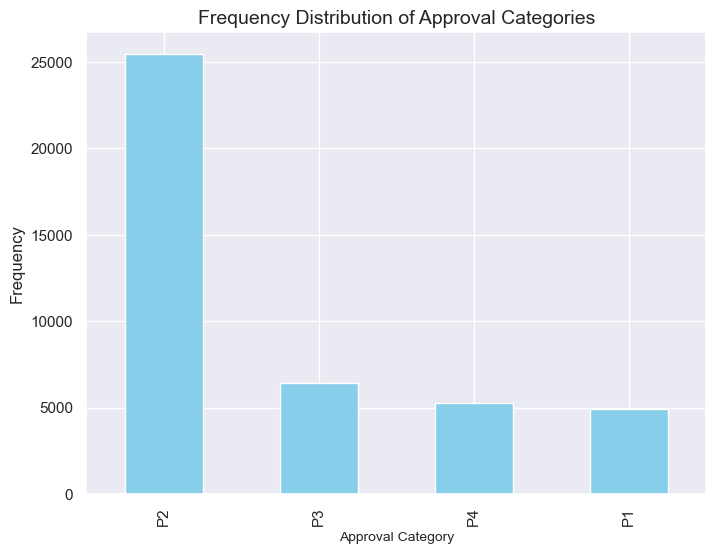

In [386]:
approval_counts = df['Approved_Flag'].value_counts()

plt.figure(figsize=(8, 6))
approval_counts.plot(kind='bar', color='skyblue')

plt.title('Frequency Distribution of Approval Categories', fontsize=14)
plt.xlabel('Approval Category', fontsize=10)
plt.ylabel('Frequency', fontsize=12)


plt.show()

In [387]:
def cat_distribution(df, col):
    
    grouped = df.groupby([col, 'Approved_Flag']).size().unstack()

    grouped['Total'] = grouped.sum(axis=1)
    grouped = grouped.sort_values('Total', ascending=False)
    
    grouped = grouped.drop(columns='Total')

    grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
    

    plt.title(f"Distribution of {col} across Approved_Flag Categories")
    plt.xlabel(col)
    plt.ylabel("Count")
    

    plt.legend(title="Approved_Flag")
    plt.xticks(rotation=45)
    
    plt.show()



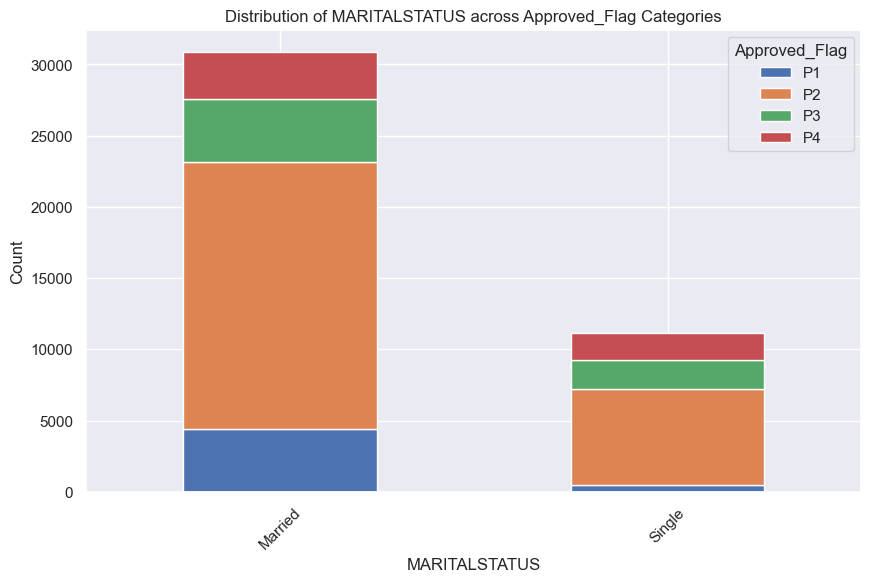

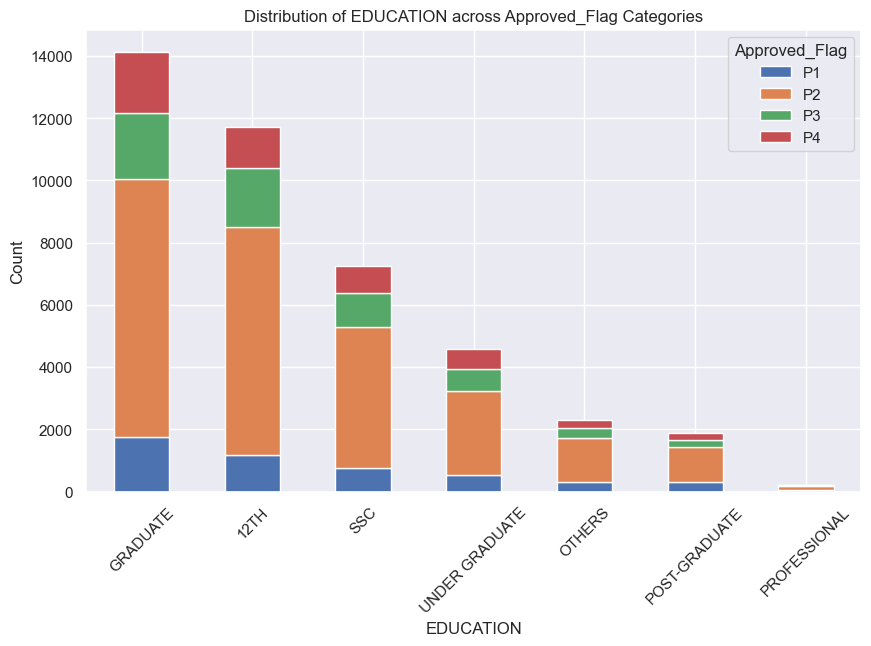

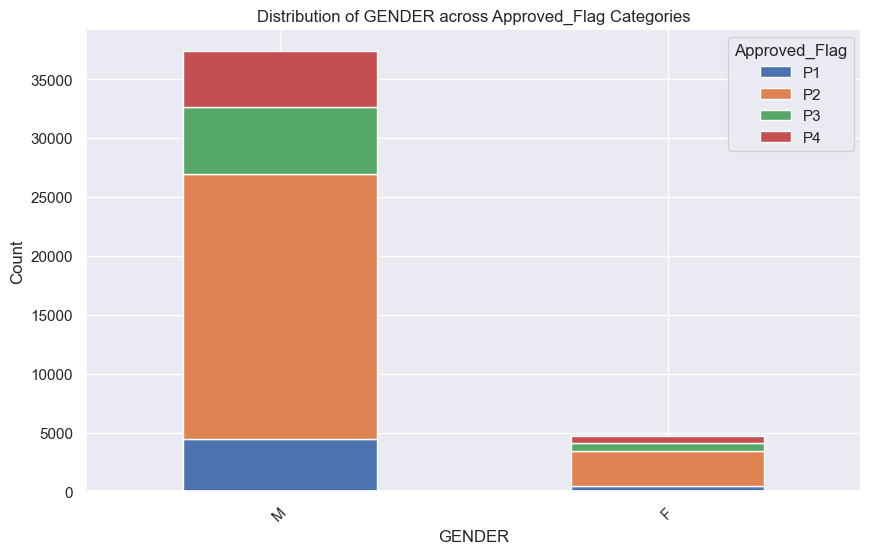

In [388]:
cat_distribution(df, "MARITALSTATUS")
cat_distribution(df, "EDUCATION")
cat_distribution(df, "GENDER")

## Variance Inflation Factor

Next, we will perform a variance inflation factor test to check for multicollinearity. </br>

Multicollinearity occurs when two or more independent variables are highly correlated, meaning they provide redundant information to the model. This can lead to unreliable or unstable coefficient estimates in our model, difficulties in discerning the effect of individual features and high standard error

VIF quantifies how much the variance (or uncertainty) of a regression coefficient is inflated due to multicollinearity. For our analysis, we will keep variables with a VIF value of 6 or less

In [389]:
num_cols= [col for col in df.columns if df[col].dtype != 'object' and col not in ['PROSPECTID','Approved_Flag']]

In [390]:
len(num_cols)

72

In [391]:
vif_data= df[num_cols]

In [392]:
total_columns = vif_data.shape[1]
columns_to_be_kept = []
column_index = 0

In [393]:
for i in range (0,total_columns):
    vif_value = variance_inflation_factor(vif_data, column_index)
    print (column_index,'---',vif_value)
    
    if vif_value <= 6:
        columns_to_be_kept.append(num_cols[i])
        column_index = column_index+1
    
    else:
        vif_data = vif_data.drop([num_cols[i] ],axis=1)

0 --- inf
0 --- inf
0 --- 11.320180023967982
0 --- 8.36369803500036
0 --- 6.5206478777909425
0 --- 5.14950161821261
1 --- 2.611111040579735
2 --- inf
2 --- 1788.7926256209232
2 --- 8.601028256477212
2 --- 3.832800792153082
3 --- 6.0996533816466405
3 --- 5.581352009642814
4 --- 1.9855843530987702
5 --- inf
5 --- 4.809538302819332
6 --- 23.270628983464636
6 --- 30.595522588099946
6 --- 4.384346405965575
7 --- 3.0646584155234122
8 --- 2.898639771299225
9 --- 4.377876915347337
10 --- 2.2078535836958486
11 --- 4.916914200506877
12 --- 5.214702030064743
13 --- 3.3861625024231516
14 --- 7.84058330947899
14 --- 5.255034641721459
15 --- inf
15 --- 7.380634506427207
15 --- 1.421005001517572
16 --- 8.083255010190301
16 --- 1.6241227524040012
17 --- 7.257811920140015
17 --- 15.596243832683006
17 --- 1.825857047132431
18 --- 1.5080839450032724
19 --- 2.1720888348245815
20 --- 2.6233975535272367
21 --- 2.2959970812106216
22 --- 7.360578319196457
22 --- 2.1602387773102514
23 --- 2.8686288267891493
24

In [394]:
len(columns_to_be_kept)

39

## ANOVA - Analysis of Variance

Next, we perform ANOVA (Analysis of Variance) tests to determine whether the numerical variables show significant differences across the groups (P1, P2, P3, P4) in the Approved_Flag column

In [395]:
columns_to_be_kept_numerical = []

df['Approved_Flag'] = df['Approved_Flag'].astype('category')

for i in columns_to_be_kept:
    # Extract numerical column values (a) and target column (Approved_Flag)
    a = df[i]
    b = df['Approved_Flag']
    
    # Create groups for each category of 'Approved_Flag'
    groups = [a[b == group] for group in ['P1', 'P2', 'P3', 'P4']]
    
    # Ensure groups are not empty
    if all(len(group) > 0 for group in groups):
        # Perform ANOVA test
        f_statistic, p_value = f_oneway(*groups)

        # If p-value is significant (<= 0.05), keep the column
        if p_value <= 0.05:
            columns_to_be_kept_numerical.append(i)

# Print the columns that passed the ANOVA test
print("Columns to be kept after ANOVA:", columns_to_be_kept_numerical)


Columns to be kept after ANOVA: ['pct_tl_open_L6M', 'pct_tl_closed_L6M', 'Tot_TL_closed_L12M', 'pct_tl_closed_L12M', 'Tot_Missed_Pmnt', 'CC_TL', 'Home_TL', 'PL_TL', 'Secured_TL', 'Unsecured_TL', 'Other_TL', 'Age_Oldest_TL', 'Age_Newest_TL', 'time_since_recent_payment', 'max_recent_level_of_deliq', 'num_deliq_6_12mts', 'num_times_60p_dpd', 'num_std_12mts', 'num_sub', 'num_sub_6mts', 'num_sub_12mts', 'num_dbt', 'num_dbt_12mts', 'num_lss', 'recent_level_of_deliq', 'CC_enq_L12m', 'PL_enq_L12m', 'time_since_recent_enq', 'enq_L3m', 'NETMONTHLYINCOME', 'Time_With_Curr_Empr', 'CC_Flag', 'PL_Flag', 'pct_PL_enq_L6m_of_ever', 'pct_CC_enq_L6m_of_ever', 'HL_Flag', 'GL_Flag']


In [396]:
len(columns_to_be_kept_numerical)

37

# Putting together the final dataset

In [397]:
features = columns_to_be_kept_numerical + categorical_cols
df= df[features+['Approved_Flag']]

In [398]:
df.shape

(42064, 44)

In [399]:
df.columns

Index(['pct_tl_open_L6M', 'pct_tl_closed_L6M', 'Tot_TL_closed_L12M',
       'pct_tl_closed_L12M', 'Tot_Missed_Pmnt', 'CC_TL', 'Home_TL', 'PL_TL',
       'Secured_TL', 'Unsecured_TL', 'Other_TL', 'Age_Oldest_TL',
       'Age_Newest_TL', 'time_since_recent_payment',
       'max_recent_level_of_deliq', 'num_deliq_6_12mts', 'num_times_60p_dpd',
       'num_std_12mts', 'num_sub', 'num_sub_6mts', 'num_sub_12mts', 'num_dbt',
       'num_dbt_12mts', 'num_lss', 'recent_level_of_deliq', 'CC_enq_L12m',
       'PL_enq_L12m', 'time_since_recent_enq', 'enq_L3m', 'NETMONTHLYINCOME',
       'Time_With_Curr_Empr', 'CC_Flag', 'PL_Flag', 'pct_PL_enq_L6m_of_ever',
       'pct_CC_enq_L6m_of_ever', 'HL_Flag', 'GL_Flag', 'MARITALSTATUS',
       'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2',
       'Approved_Flag', 'Approved_Flag'],
      dtype='object')

## Handling outliers and skewness

To evaluate the skewness of our data, we will start by applying the .skew() method. Positive values indicate right skewness (a longer tail on the right), negative values indicate left skewness (a longer tail on the left), and values close to 0 suggest that the data is approximately symmetric with no significant skewness

Next, we'll visualize the distribution of each variable to gain a clearer understanding of the degree of skewness present in the data

In [400]:
df.skew()

pct_tl_open_L6M               1.629809
pct_tl_closed_L6M             2.794514
Tot_TL_closed_L12M            4.250632
pct_tl_closed_L12M            1.889168
Tot_Missed_Pmnt               5.371809
CC_TL                         8.874829
Home_TL                       6.810367
PL_TL                         6.172651
Secured_TL                    7.515564
Unsecured_TL                  3.779124
Other_TL                      6.861918
Age_Oldest_TL                 1.604417
Age_Newest_TL                 3.524605
time_since_recent_payment     4.510606
max_recent_level_of_deliq    11.088498
num_deliq_6_12mts             4.595840
num_times_60p_dpd             8.600872
num_std_12mts                 4.173850
num_sub                      21.008687
num_sub_6mts                 45.296119
num_sub_12mts                34.450688
num_dbt                      34.148832
num_dbt_12mts                50.067984
num_lss                      67.951738
recent_level_of_deliq        12.950406
CC_enq_L12m              

<Axes: xlabel='pct_tl_open_L6M', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of pct_tl_open_L6M')

Text(0.5, 0, 'pct_tl_open_L6M')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='pct_tl_closed_L6M', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of pct_tl_closed_L6M')

Text(0.5, 0, 'pct_tl_closed_L6M')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Tot_TL_closed_L12M', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Tot_TL_closed_L12M')

Text(0.5, 0, 'Tot_TL_closed_L12M')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='pct_tl_closed_L12M', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of pct_tl_closed_L12M')

Text(0.5, 0, 'pct_tl_closed_L12M')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Tot_Missed_Pmnt', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Tot_Missed_Pmnt')

Text(0.5, 0, 'Tot_Missed_Pmnt')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='CC_TL', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of CC_TL')

Text(0.5, 0, 'CC_TL')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Home_TL', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Home_TL')

Text(0.5, 0, 'Home_TL')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='PL_TL', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of PL_TL')

Text(0.5, 0, 'PL_TL')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Secured_TL', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Secured_TL')

Text(0.5, 0, 'Secured_TL')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Unsecured_TL', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Unsecured_TL')

Text(0.5, 0, 'Unsecured_TL')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Other_TL', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Other_TL')

Text(0.5, 0, 'Other_TL')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Age_Oldest_TL', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Age_Oldest_TL')

Text(0.5, 0, 'Age_Oldest_TL')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Age_Newest_TL', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Age_Newest_TL')

Text(0.5, 0, 'Age_Newest_TL')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='time_since_recent_payment', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of time_since_recent_payment')

Text(0.5, 0, 'time_since_recent_payment')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='max_recent_level_of_deliq', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of max_recent_level_of_deliq')

Text(0.5, 0, 'max_recent_level_of_deliq')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='num_deliq_6_12mts', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of num_deliq_6_12mts')

Text(0.5, 0, 'num_deliq_6_12mts')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='num_times_60p_dpd', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of num_times_60p_dpd')

Text(0.5, 0, 'num_times_60p_dpd')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='num_std_12mts', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of num_std_12mts')

Text(0.5, 0, 'num_std_12mts')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='num_sub', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of num_sub')

Text(0.5, 0, 'num_sub')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='num_sub_6mts', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of num_sub_6mts')

Text(0.5, 0, 'num_sub_6mts')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='num_sub_12mts', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of num_sub_12mts')

Text(0.5, 0, 'num_sub_12mts')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='num_dbt', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of num_dbt')

Text(0.5, 0, 'num_dbt')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='num_dbt_12mts', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of num_dbt_12mts')

Text(0.5, 0, 'num_dbt_12mts')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='num_lss', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of num_lss')

Text(0.5, 0, 'num_lss')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='recent_level_of_deliq', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of recent_level_of_deliq')

Text(0.5, 0, 'recent_level_of_deliq')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='CC_enq_L12m', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of CC_enq_L12m')

Text(0.5, 0, 'CC_enq_L12m')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='PL_enq_L12m', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of PL_enq_L12m')

Text(0.5, 0, 'PL_enq_L12m')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='time_since_recent_enq', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of time_since_recent_enq')

Text(0.5, 0, 'time_since_recent_enq')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='enq_L3m', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of enq_L3m')

Text(0.5, 0, 'enq_L3m')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='NETMONTHLYINCOME', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of NETMONTHLYINCOME')

Text(0.5, 0, 'NETMONTHLYINCOME')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Time_With_Curr_Empr', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Time_With_Curr_Empr')

Text(0.5, 0, 'Time_With_Curr_Empr')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='CC_Flag', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of CC_Flag')

Text(0.5, 0, 'CC_Flag')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='PL_Flag', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of PL_Flag')

Text(0.5, 0, 'PL_Flag')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='pct_PL_enq_L6m_of_ever', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of pct_PL_enq_L6m_of_ever')

Text(0.5, 0, 'pct_PL_enq_L6m_of_ever')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='pct_CC_enq_L6m_of_ever', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of pct_CC_enq_L6m_of_ever')

Text(0.5, 0, 'pct_CC_enq_L6m_of_ever')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='HL_Flag', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of HL_Flag')

Text(0.5, 0, 'HL_Flag')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='GL_Flag', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of GL_Flag')

Text(0.5, 0, 'GL_Flag')

Text(0, 0.5, 'Frequency')

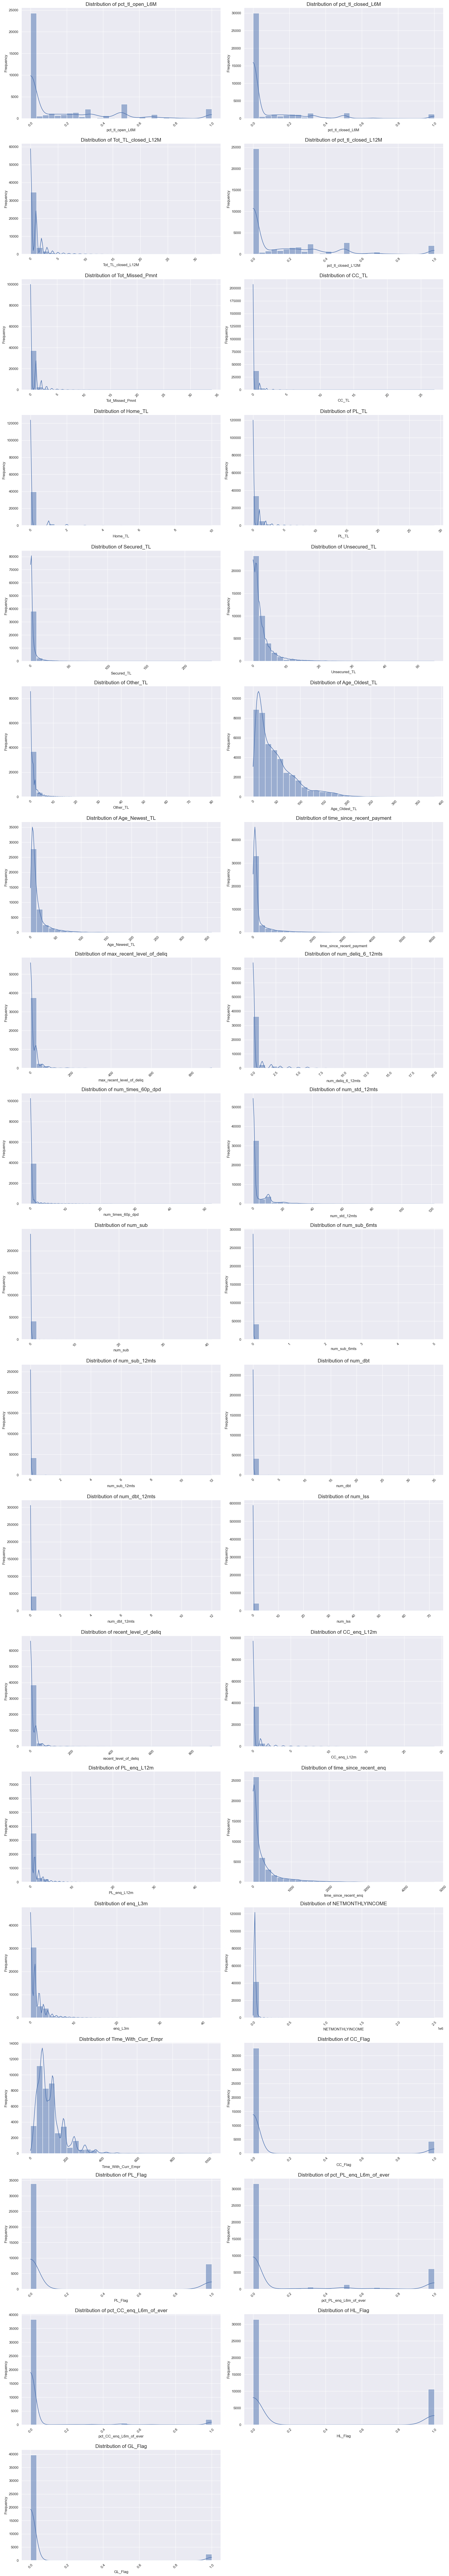

In [401]:
numeric_columns = df.select_dtypes(include='number').columns 
n_rows = (len(numeric_columns) + 2) // 2  # Add 2 to round up if the total number isn't divisible by 3

fig, axes = plt.subplots(n_rows, 2, figsize=(20, 6 * n_rows))
axes = axes.flatten()

# Loop through each column and plot its histogram
for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=16)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots 
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## Boxplots

In [402]:
df_num = df.select_dtypes(include=['number'])

<Figure size 1500x1000 with 0 Axes>

<Axes: >

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 [Text(0, 0, 'pct_tl_open_L6M'),
  Text(1, 0, 'pct_tl_closed_L6M'),
  Text(2, 0, 'Tot_TL_closed_L12M'),
  Text(3, 0, 'pct_tl_closed_L12M'),
  Text(4, 0, 'Tot_Missed_Pmnt'),
  Text(5, 0, 'CC_TL'),
  Text(6, 0, 'Home_TL'),
  Text(7, 0, 'PL_TL'),
  Text(8, 0, 'Secured_TL'),
  Text(9, 0, 'Unsecured_TL'),
  Text(10, 0, 'Other_TL'),
  Text(11, 0, 'Age_Oldest_TL'),
  Text(12, 0, 'Age_Newest_TL'),
  Text(13, 0, 'time_since_recent_payment'),
  Text(14, 0, 'max_recent_level_of_deliq'),
  Text(15, 0, 'num_deliq_6_12mts'),
  Text(16, 0, 'num_times_60p_dpd'),
  Text(17, 0, 'num_std_12mts'),
  Text(18, 0, 'num_sub'),
  Text(19, 0, 'num_sub_6mts'),
  Text(20, 0, 'num_sub_12mts'),
  Text(21, 0, 'num_dbt'),
  Text(22, 0, 'num_dbt_12mts'),
  Text(23, 0, 'num_lss'),
  Text(24, 0, 'recent_level_of_deliq'),
  Text(25, 0, 'CC_enq_L12m')

Text(0.5, 1.0, 'Boxplots of Unscaled Numerical Variables')

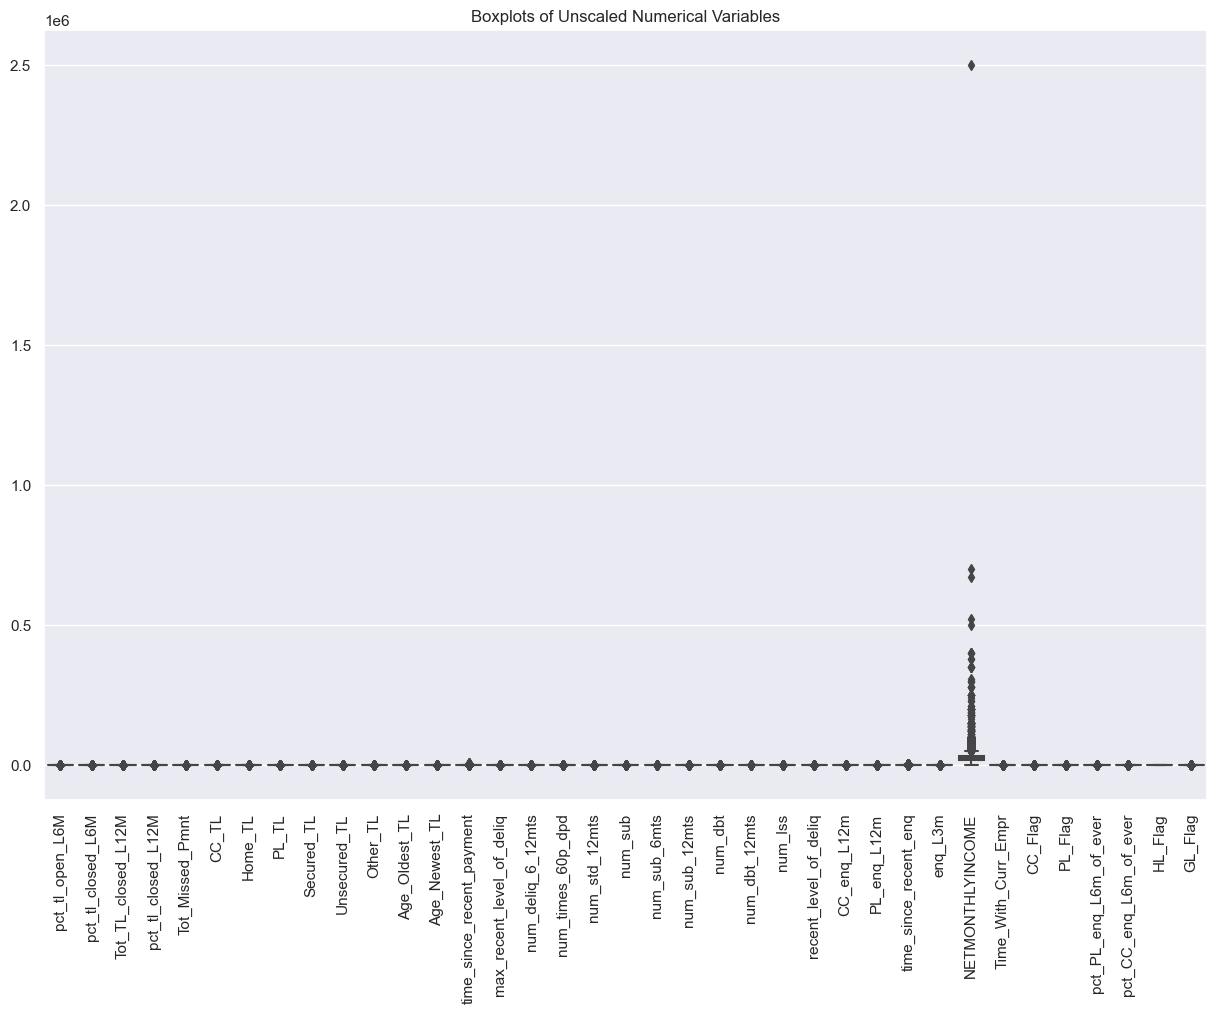

In [403]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_num)
plt.xticks(rotation=90)
#plt.yscale('log')
plt.title('Boxplots of Unscaled Numerical Variables')
plt.show()

<Figure size 1500x1000 with 0 Axes>

<Axes: >

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 [Text(0, 0, 'pct_tl_open_L6M'),
  Text(1, 0, 'pct_tl_closed_L6M'),
  Text(2, 0, 'Tot_TL_closed_L12M'),
  Text(3, 0, 'pct_tl_closed_L12M'),
  Text(4, 0, 'Tot_Missed_Pmnt'),
  Text(5, 0, 'CC_TL'),
  Text(6, 0, 'Home_TL'),
  Text(7, 0, 'PL_TL'),
  Text(8, 0, 'Secured_TL'),
  Text(9, 0, 'Unsecured_TL'),
  Text(10, 0, 'Other_TL'),
  Text(11, 0, 'Age_Oldest_TL'),
  Text(12, 0, 'Age_Newest_TL'),
  Text(13, 0, 'time_since_recent_payment'),
  Text(14, 0, 'max_recent_level_of_deliq'),
  Text(15, 0, 'num_deliq_6_12mts'),
  Text(16, 0, 'num_times_60p_dpd'),
  Text(17, 0, 'num_std_12mts'),
  Text(18, 0, 'num_sub'),
  Text(19, 0, 'num_sub_6mts'),
  Text(20, 0, 'num_sub_12mts'),
  Text(21, 0, 'num_dbt'),
  Text(22, 0, 'num_dbt_12mts'),
  Text(23, 0, 'num_lss'),
  Text(24, 0, 'recent_level_of_deliq'),
  Text(25, 0, 'CC_enq_L12m')

Text(0.5, 1.0, 'Boxplots of Unscaled Numerical Variables')

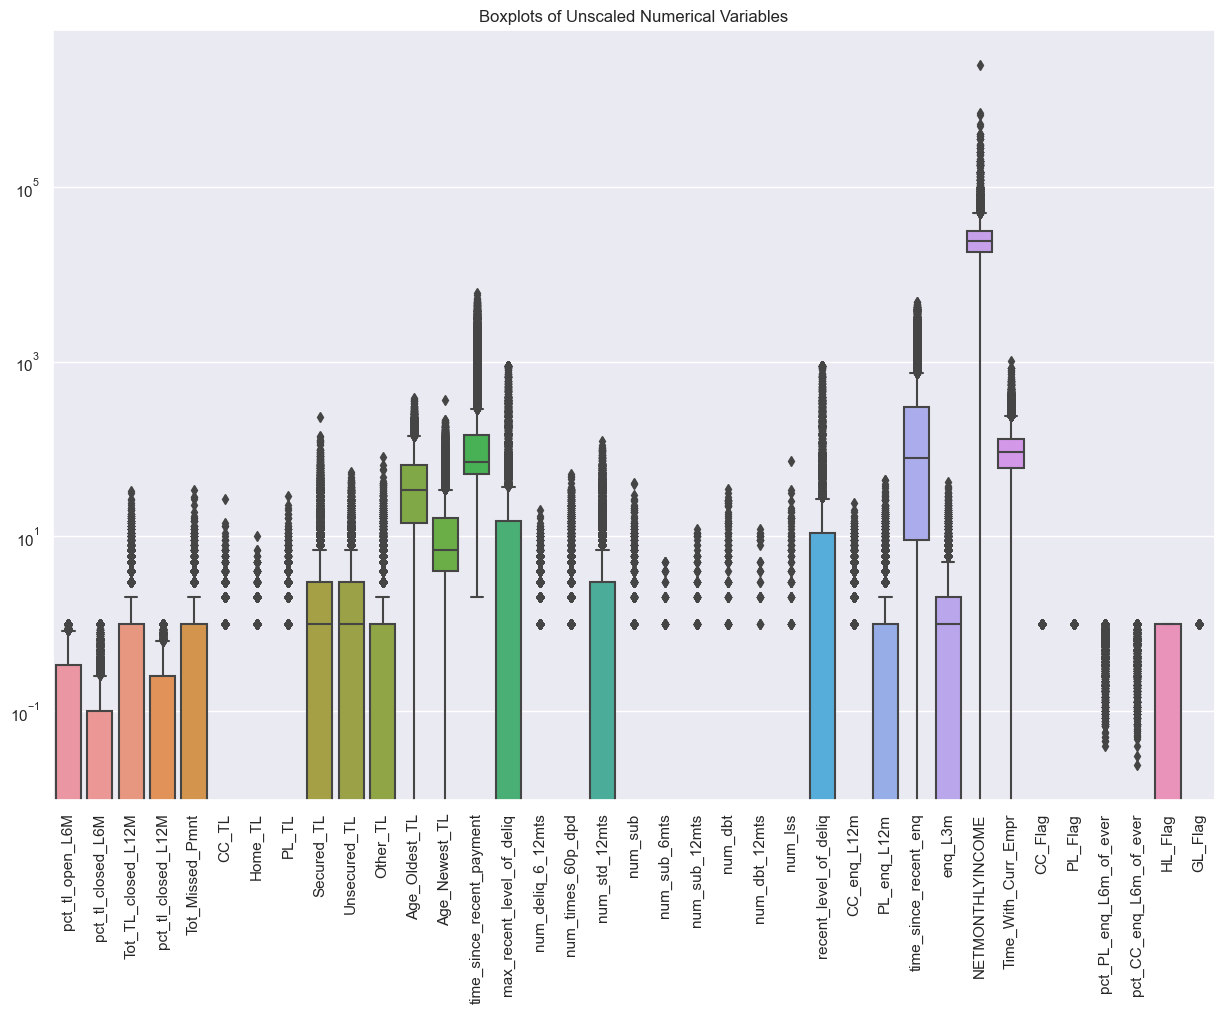

In [404]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_num)
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Boxplots of Unscaled Numerical Variables')
plt.show()

### Remove outliers using IQR

In [405]:
def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    
    # Determine the lower and upper bound for each column
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove rows that have outliers in any column
    df_filtered = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
    
    return df_filtered

In [406]:
df1_iqr= remove_outliers_iqr(df_num)

<Figure size 1500x1000 with 0 Axes>

<Axes: >

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 [Text(0, 0, 'pct_tl_open_L6M'),
  Text(1, 0, 'pct_tl_closed_L6M'),
  Text(2, 0, 'Tot_TL_closed_L12M'),
  Text(3, 0, 'pct_tl_closed_L12M'),
  Text(4, 0, 'Tot_Missed_Pmnt'),
  Text(5, 0, 'CC_TL'),
  Text(6, 0, 'Home_TL'),
  Text(7, 0, 'PL_TL'),
  Text(8, 0, 'Secured_TL'),
  Text(9, 0, 'Unsecured_TL'),
  Text(10, 0, 'Other_TL'),
  Text(11, 0, 'Age_Oldest_TL'),
  Text(12, 0, 'Age_Newest_TL'),
  Text(13, 0, 'time_since_recent_payment'),
  Text(14, 0, 'max_recent_level_of_deliq'),
  Text(15, 0, 'num_deliq_6_12mts'),
  Text(16, 0, 'num_times_60p_dpd'),
  Text(17, 0, 'num_std_12mts'),
  Text(18, 0, 'num_sub'),
  Text(19, 0, 'num_sub_6mts'),
  Text(20, 0, 'num_sub_12mts'),
  Text(21, 0, 'num_dbt'),
  Text(22, 0, 'num_dbt_12mts'),
  Text(23, 0, 'num_lss'),
  Text(24, 0, 'recent_level_of_deliq'),
  Text(25, 0, 'CC_enq_L12m')

Text(0.5, 1.0, 'Boxplots of Numerical Variables Using IQR')

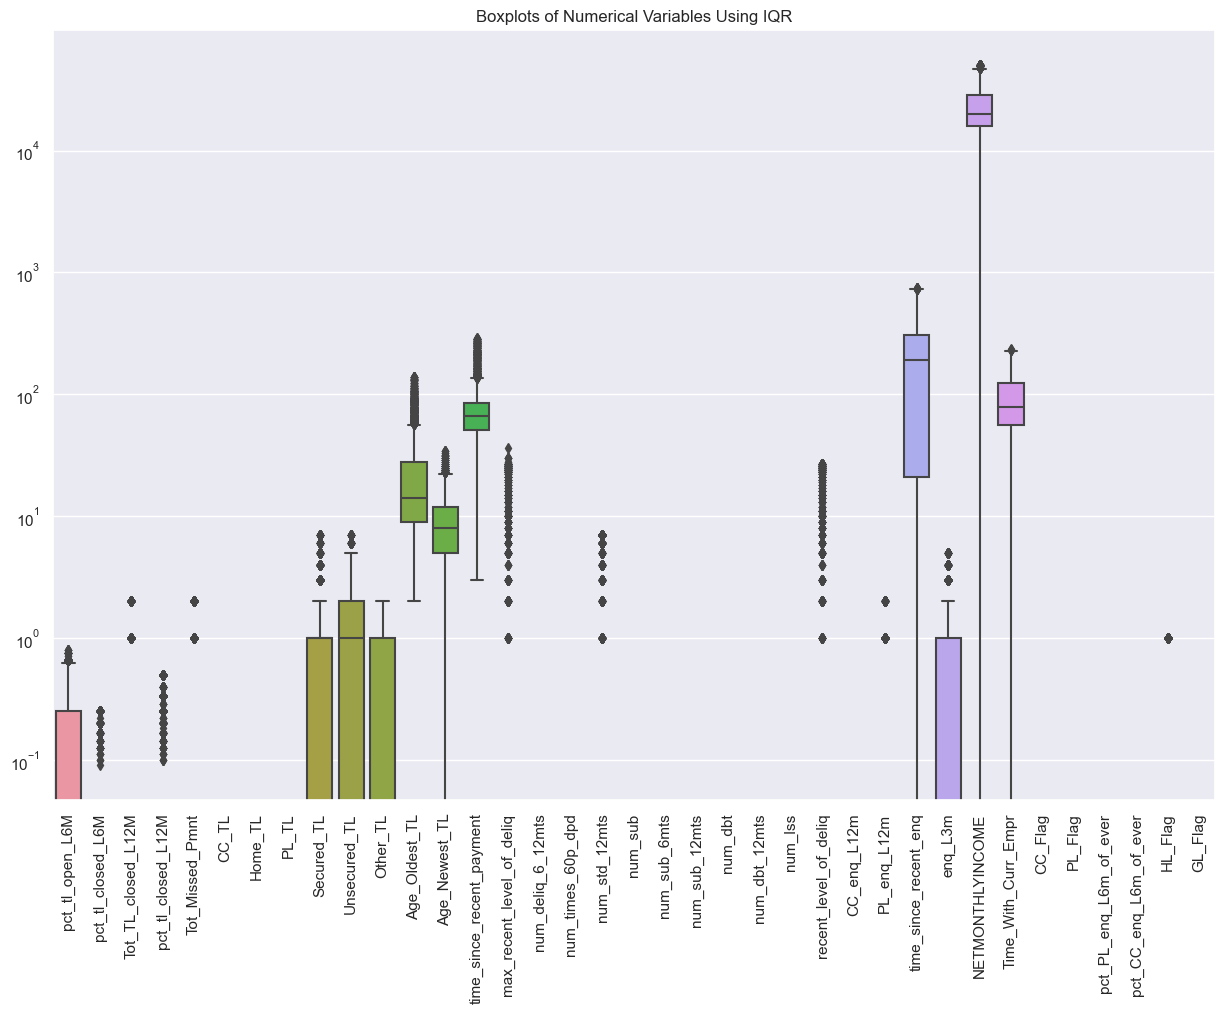

In [407]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df1_iqr)
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Boxplots of Numerical Variables Using IQR')
plt.show()

### Remove outliers using modified Z-score
Instead of using the mean and standard deviation, the modified Z-score uses the median and median absolute deviation (MAD) to handle data with outliers or non-normal distributions better

In [408]:
def remove_outliers_modified_zscore(df, threshold=3):
    median = df.median()
    mad = (df - median).abs().median()
    modified_z_scores = 0.6745 * (df - median) / mad
    return df[(modified_z_scores.abs() < threshold).all(axis=1)]

In [409]:
df_num.median()

pct_tl_open_L6M                  0.0
pct_tl_closed_L6M                0.0
Tot_TL_closed_L12M               0.0
pct_tl_closed_L12M               0.0
Tot_Missed_Pmnt                  0.0
CC_TL                            0.0
Home_TL                          0.0
PL_TL                            0.0
Secured_TL                       1.0
Unsecured_TL                     1.0
Other_TL                         0.0
Age_Oldest_TL                   34.0
Age_Newest_TL                    7.0
time_since_recent_payment       71.0
max_recent_level_of_deliq        0.0
num_deliq_6_12mts                0.0
num_times_60p_dpd                0.0
num_std_12mts                    0.0
num_sub                          0.0
num_sub_6mts                     0.0
num_sub_12mts                    0.0
num_dbt                          0.0
num_dbt_12mts                    0.0
num_lss                          0.0
recent_level_of_deliq            0.0
CC_enq_L12m                      0.0
PL_enq_L12m                      0.0
t

Because the MAD (Median Absolute Deviation) is zero due to columns having many repeated values, using this method would result in an empty DataFrame

### Percentile-Based Outlier Removal

Removes outliers by defining lower and upper bounds based on percentiles. For example, we might remove values below the 1st percentile and above the 99th percentile.It is useful for data with extreme skewness or when we want to remove extreme values at both ends of the distribution

In [410]:
def remove_outliers_percentile(df, lower_percentile=0.01, upper_percentile=0.80):
    lower_bound = df.quantile(lower_percentile)
    upper_bound = df.quantile(upper_percentile)
    return df[(df >= lower_bound) & (df <= upper_bound)].dropna()

In [411]:
percentile_df= remove_outliers_percentile(df_num)

<Figure size 1500x1000 with 0 Axes>

<Axes: >

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 [Text(0, 0, 'pct_tl_open_L6M'),
  Text(1, 0, 'pct_tl_closed_L6M'),
  Text(2, 0, 'Tot_TL_closed_L12M'),
  Text(3, 0, 'pct_tl_closed_L12M'),
  Text(4, 0, 'Tot_Missed_Pmnt'),
  Text(5, 0, 'CC_TL'),
  Text(6, 0, 'Home_TL'),
  Text(7, 0, 'PL_TL'),
  Text(8, 0, 'Secured_TL'),
  Text(9, 0, 'Unsecured_TL'),
  Text(10, 0, 'Other_TL'),
  Text(11, 0, 'Age_Oldest_TL'),
  Text(12, 0, 'Age_Newest_TL'),
  Text(13, 0, 'time_since_recent_payment'),
  Text(14, 0, 'max_recent_level_of_deliq'),
  Text(15, 0, 'num_deliq_6_12mts'),
  Text(16, 0, 'num_times_60p_dpd'),
  Text(17, 0, 'num_std_12mts'),
  Text(18, 0, 'num_sub'),
  Text(19, 0, 'num_sub_6mts'),
  Text(20, 0, 'num_sub_12mts'),
  Text(21, 0, 'num_dbt'),
  Text(22, 0, 'num_dbt_12mts'),
  Text(23, 0, 'num_lss'),
  Text(24, 0, 'recent_level_of_deliq'),
  Text(25, 0, 'CC_enq_L12m')

Text(0.5, 1.0, 'Boxplots of Numerical Variables Using Percentile Outlier Remover')

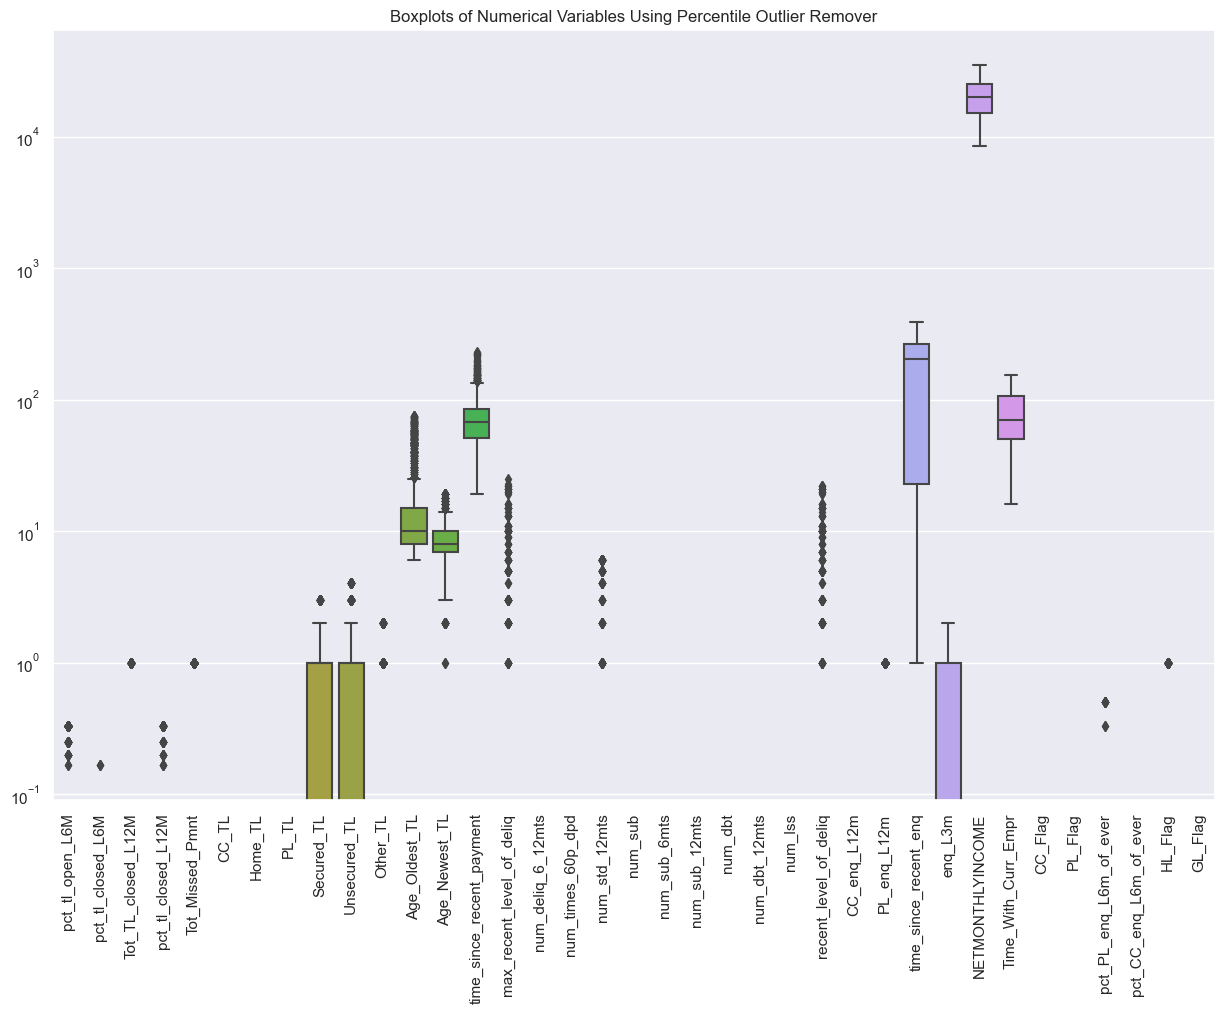

In [412]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=percentile_df)
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Boxplots of Numerical Variables Using Percentile Outlier Remover')
plt.show()

## Transforming data

Next, let's apply some transformation to the data to reduce the impact of outliers.

### Log transformation

Best for right skewed data as it reduces the impact of large positive numbers

In [413]:
df_log = np.log1p(df_num)

<Figure size 1500x1000 with 0 Axes>

<Axes: >

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 [Text(0, 0, 'pct_tl_open_L6M'),
  Text(1, 0, 'pct_tl_closed_L6M'),
  Text(2, 0, 'Tot_TL_closed_L12M'),
  Text(3, 0, 'pct_tl_closed_L12M'),
  Text(4, 0, 'Tot_Missed_Pmnt'),
  Text(5, 0, 'CC_TL'),
  Text(6, 0, 'Home_TL'),
  Text(7, 0, 'PL_TL'),
  Text(8, 0, 'Secured_TL'),
  Text(9, 0, 'Unsecured_TL'),
  Text(10, 0, 'Other_TL'),
  Text(11, 0, 'Age_Oldest_TL'),
  Text(12, 0, 'Age_Newest_TL'),
  Text(13, 0, 'time_since_recent_payment'),
  Text(14, 0, 'max_recent_level_of_deliq'),
  Text(15, 0, 'num_deliq_6_12mts'),
  Text(16, 0, 'num_times_60p_dpd'),
  Text(17, 0, 'num_std_12mts'),
  Text(18, 0, 'num_sub'),
  Text(19, 0, 'num_sub_6mts'),
  Text(20, 0, 'num_sub_12mts'),
  Text(21, 0, 'num_dbt'),
  Text(22, 0, 'num_dbt_12mts'),
  Text(23, 0, 'num_lss'),
  Text(24, 0, 'recent_level_of_deliq'),
  Text(25, 0, 'CC_enq_L12m')

Text(0.5, 1.0, 'Boxplots of Numerical Variables on a Log Scale')

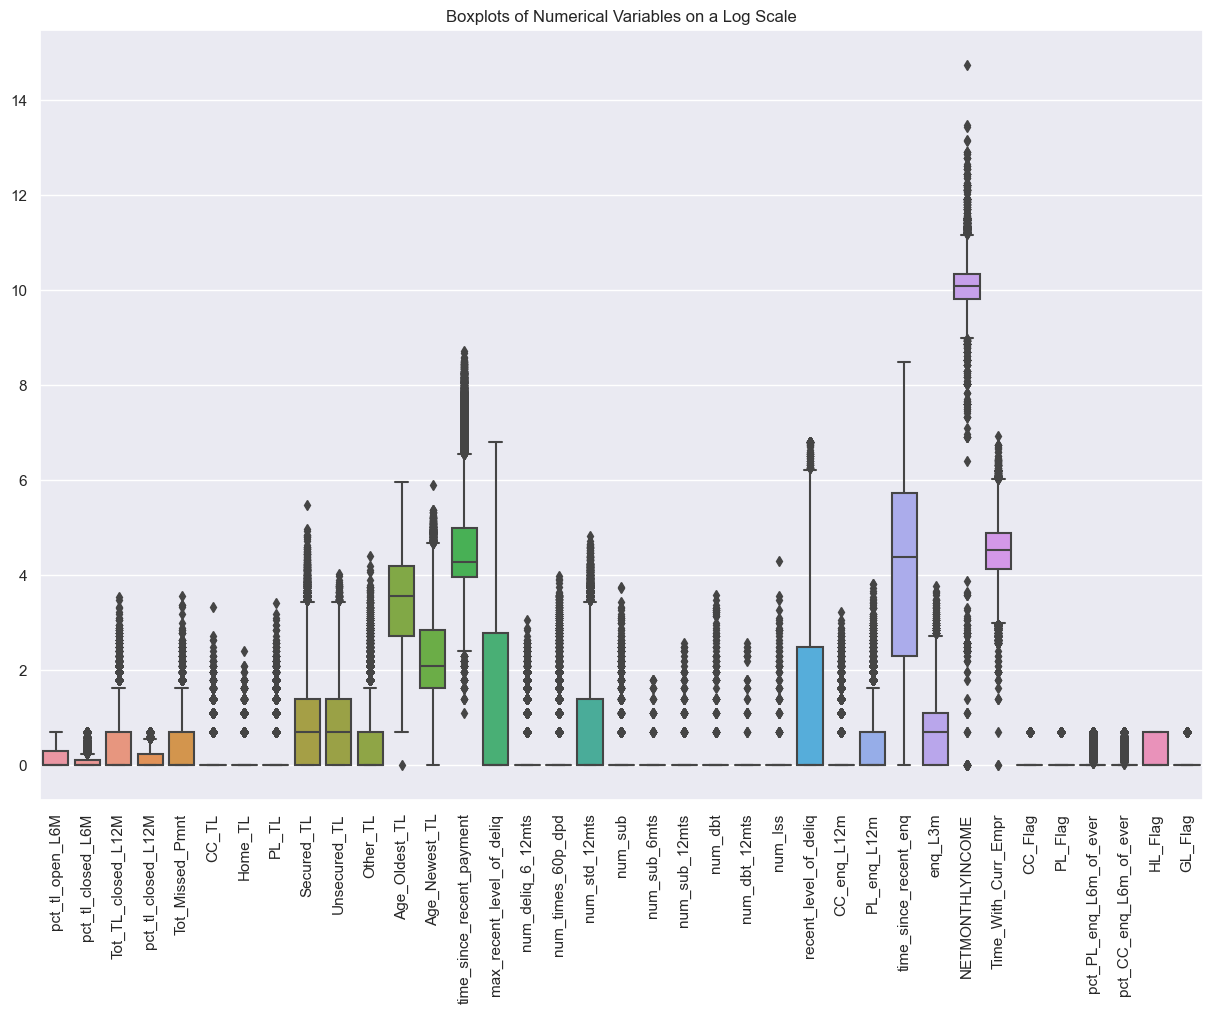

In [414]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_log)
plt.xticks(rotation=90)
plt.title('Boxplots of Numerical Variables on a Log Scale')
plt.show()

In [415]:
df_num.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pct_tl_open_L6M,42064.0,0.179032,0.278043,0.0,0.0,0.0,0.333,1.0
pct_tl_closed_L6M,42064.0,0.097783,0.210957,0.0,0.0,0.0,0.100,1.0
Tot_TL_closed_L12M,42064.0,0.825504,1.537208,0.0,0.0,0.0,1.000,33.0
pct_tl_closed_L12M,42064.0,0.160365,0.258831,0.0,0.0,0.0,0.250,1.0
Tot_Missed_Pmnt,42064.0,0.525746,1.106442,0.0,0.0,0.0,1.000,34.0
CC_TL,42064.0,0.145921,0.549314,0.0,0.0,0.0,0.000,27.0
Home_TL,42064.0,0.076241,0.358582,0.0,0.0,0.0,0.000,10.0
PL_TL,42064.0,0.328000,0.916368,0.0,0.0,0.0,0.000,29.0
Secured_TL,42064.0,2.921334,6.379764,0.0,0.0,1.0,3.000,235.0
Unsecured_TL,42064.0,2.341646,3.405397,0.0,0.0,1.0,3.000,55.0


### Box-Cox Transformation (Positive values only)

Used to stabilize variance and make the data more normal-like. </br>
It works for positive values and offers flexibility in transformation by adjusting the lambda parameter. It is best for data with positive values that require normalization

In [416]:
def apply_boxcox(df):
    df_transformed = pd.DataFrame()
    
    for col in df.columns:
        # Check if the column has all positive values
        if (df[col] > 0).all():
            # Apply Box-Cox transformation
            transformed_col, _ = stats.boxcox(df[col])
            df_transformed[col] = transformed_col
        else:
            print(f"Cannot apply Box-Cox on column {col} because it contains zero or negative values.")
    
    return df_transformed

In [417]:
df1_box= apply_boxcox(df_num)

Cannot apply Box-Cox on column pct_tl_open_L6M because it contains zero or negative values.
Cannot apply Box-Cox on column pct_tl_closed_L6M because it contains zero or negative values.
Cannot apply Box-Cox on column Tot_TL_closed_L12M because it contains zero or negative values.
Cannot apply Box-Cox on column pct_tl_closed_L12M because it contains zero or negative values.
Cannot apply Box-Cox on column Tot_Missed_Pmnt because it contains zero or negative values.
Cannot apply Box-Cox on column CC_TL because it contains zero or negative values.
Cannot apply Box-Cox on column Home_TL because it contains zero or negative values.
Cannot apply Box-Cox on column PL_TL because it contains zero or negative values.
Cannot apply Box-Cox on column Secured_TL because it contains zero or negative values.
Cannot apply Box-Cox on column Unsecured_TL because it contains zero or negative values.
Cannot apply Box-Cox on column Other_TL because it contains zero or negative values.
Cannot apply Box-Cox on

### Yeo Johonson Transformation

A variant of Box-Cox that also works for negative values and zero, making it more flexible.</br>
It is best for data that includes negative or zero values.

In [418]:
pt = PowerTransformer(method='yeo-johnson')
df1_yeo = pt.fit_transform(df_num)

In [419]:
df1_yeo

array([[-0.80042437, -0.61905144, -0.82666254, ..., -0.31149   ,
         1.72179027, -0.24489547],
       [-0.80042437, -0.61905144, -0.82666254, ..., -0.31149   ,
        -0.58079083, -0.24489547],
       [ 0.33940985, -0.61905144, -0.82666254, ..., -0.31149   ,
         1.72179027, -0.24489547],
       ...,
       [ 1.45874068,  1.90520791,  0.90349849, ..., -0.31149   ,
        -0.58079083, -0.24489547],
       [-0.80042437, -0.61905144,  0.90349849, ..., -0.31149   ,
        -0.58079083, -0.24489547],
       [-0.80042437, -0.61905144, -0.82666254, ..., -0.31149   ,
        -0.58079083, -0.24489547]])

<Axes: >

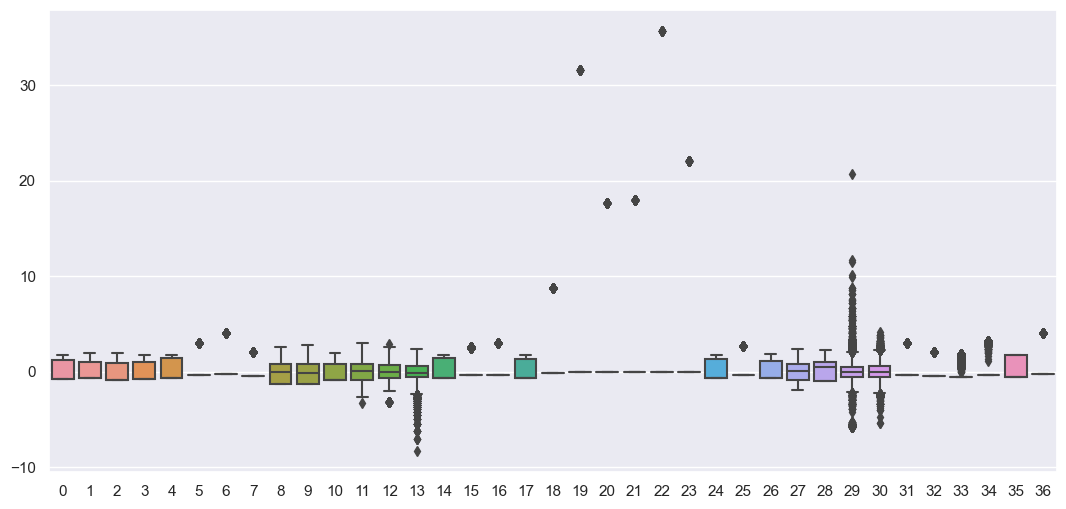

In [420]:
sns.set_theme(rc={'figure.figsize':(13,6)})
sns.boxplot(data= df1_yeo)

### Robust Scaling

Scales the data based on the interquartile range (IQR), which is robust to outliers. </br> 
It subtracts the median and scales according to the IQR, making it less sensitive to outliers.</br>

It is best for datasets with significant outliers where you want to reduce the influence of extreme values.

In [421]:
scaler = RobustScaler()
df_robust = scaler.fit_transform(df_num)

<Figure size 1500x1000 with 0 Axes>

<Axes: >

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32'),
  Text(33, 0, '33'),
  Text(34, 0, '34'),
  Text(35, 0, '35'),
  Text(36, 0, '36')])

Text(0.5, 1.0, 'Boxplots of Numerical Variables transformed with robust scaling')

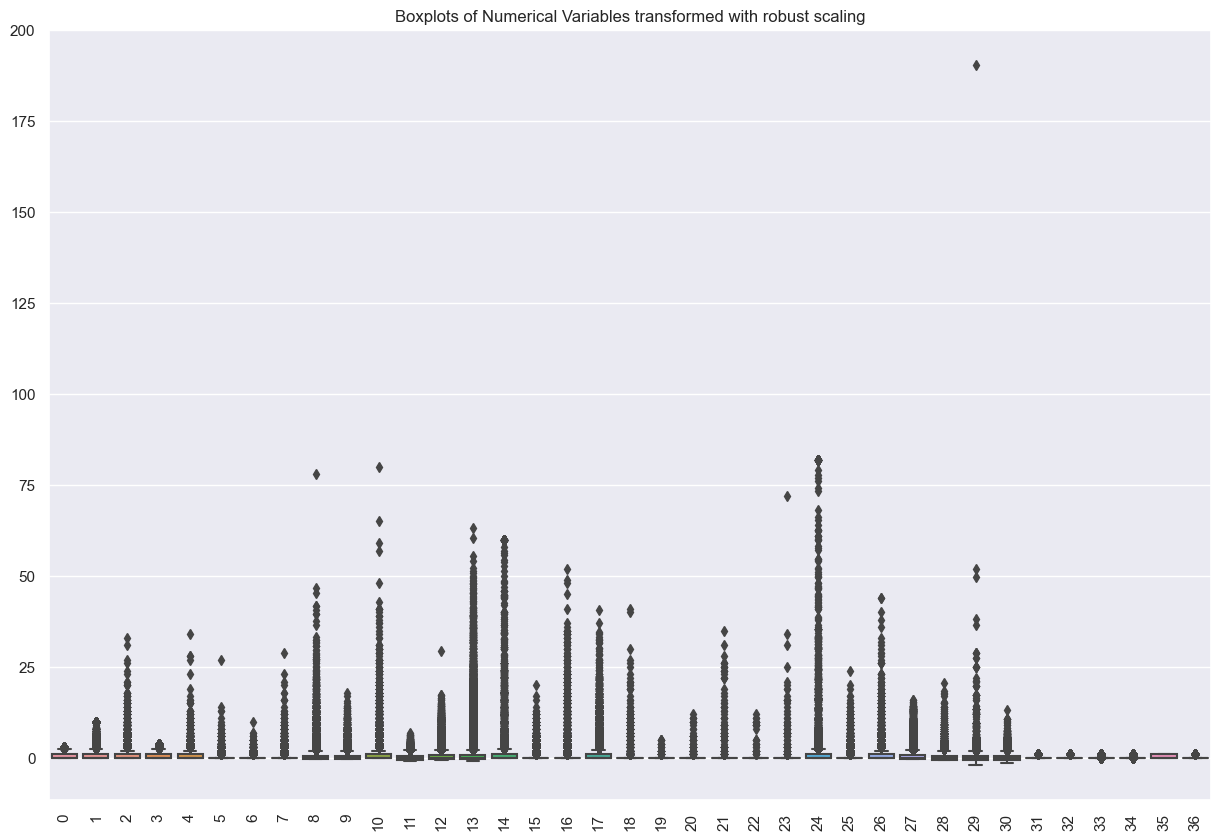

In [422]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_robust)
plt.xticks(rotation=90)
plt.title('Boxplots of Numerical Variables transformed with robust scaling')
plt.show()

### Min-Max scaling

Scales the data to a fixed range, typically between 0 and 1, by adjusting the minimum and maximum values. However, this method is sensitive to outliers since they can dominate the range.</br>

It is best for when we want to normalize data but we need to be aware of potential sensitivity to outliers.

In [423]:
min_scaler = MinMaxScaler()
df1_min_max = min_scaler.fit_transform(df_num)

<Axes: >

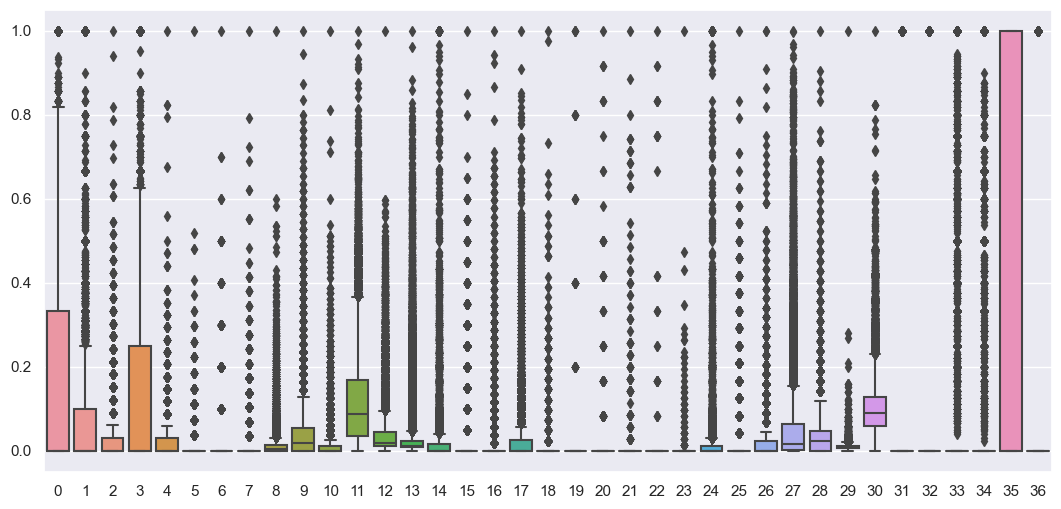

In [424]:
sns.boxplot(data= df1_min_max)

### Winsorization

Winsorization limits extreme values but keeps them in the dataset by setting the outliers to the nearest non-outlier value.</br>
It is best for reducing the impact of extreme outliers while keeping the overall data structure intact.

In [425]:
def apply_winsorization(df, lower_percentile=0.05, upper_percentile=0.05):
    df_winsorized = df.copy()
    
    for col in df_winsorized.select_dtypes(include=[float, int]).columns:  # Apply only to numeric columns
        df_winsorized[col] = winsorize(df_winsorized[col], limits=(lower_percentile, upper_percentile))
    
    return df_winsorized

In [426]:
df1_winso= apply_winsorization(df_num)

<Figure size 1500x1000 with 0 Axes>

<Axes: >

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 [Text(0, 0, 'pct_tl_open_L6M'),
  Text(1, 0, 'pct_tl_closed_L6M'),
  Text(2, 0, 'Tot_TL_closed_L12M'),
  Text(3, 0, 'pct_tl_closed_L12M'),
  Text(4, 0, 'Tot_Missed_Pmnt'),
  Text(5, 0, 'CC_TL'),
  Text(6, 0, 'Home_TL'),
  Text(7, 0, 'PL_TL'),
  Text(8, 0, 'Secured_TL'),
  Text(9, 0, 'Unsecured_TL'),
  Text(10, 0, 'Other_TL'),
  Text(11, 0, 'Age_Oldest_TL'),
  Text(12, 0, 'Age_Newest_TL'),
  Text(13, 0, 'time_since_recent_payment'),
  Text(14, 0, 'max_recent_level_of_deliq'),
  Text(15, 0, 'num_deliq_6_12mts'),
  Text(16, 0, 'num_times_60p_dpd'),
  Text(17, 0, 'num_std_12mts'),
  Text(18, 0, 'num_sub'),
  Text(19, 0, 'num_sub_6mts'),
  Text(20, 0, 'num_sub_12mts'),
  Text(21, 0, 'num_dbt'),
  Text(22, 0, 'num_dbt_12mts'),
  Text(23, 0, 'num_lss'),
  Text(24, 0, 'recent_level_of_deliq'),
  Text(25, 0, 'CC_enq_L12m')

Text(0.5, 1.0, 'Boxplots of Winsorized Numerical Variables')

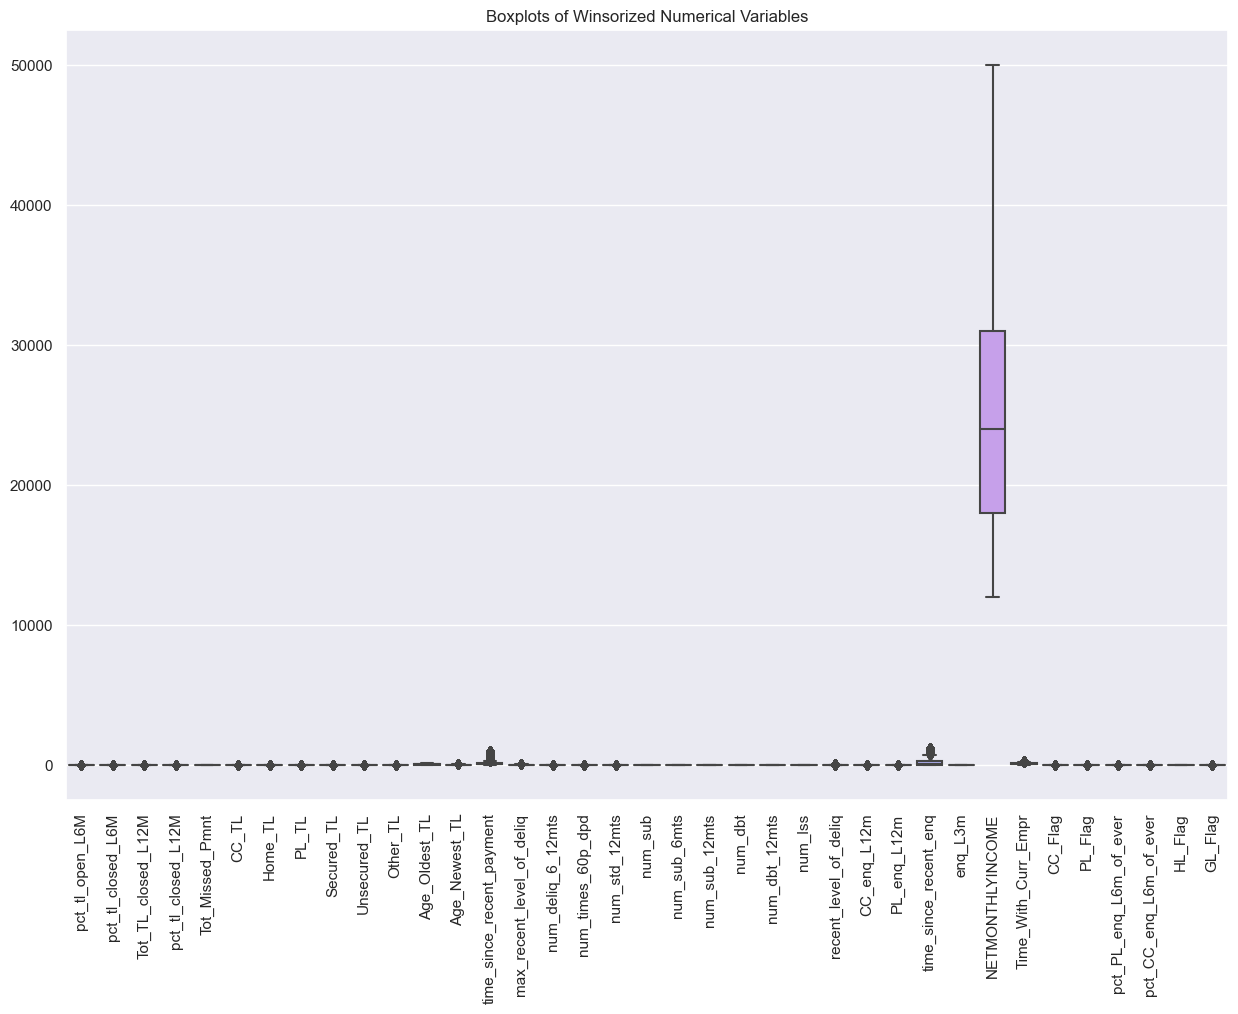

In [427]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df1_winso)
plt.xticks(rotation=90)
plt.title('Boxplots of Winsorized Numerical Variables')
plt.show()

## Feature engineering

Create new feattures from existing ones to make the data more suitable for modeling.

1. Account Age Differences: Measures the difference between the oldest and newest accounts to capture account tenure

In [428]:
df_log.loc[:, 'Account_Tenure'] = df1_log.loc[:, 'Age_Oldest_TL'] - df1_log.loc[:,'Age_Newest_TL']

<Axes: xlabel='Account_Tenure', ylabel='Count'>

Text(0.5, 0, 'Value')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distriution of Account Tenure')

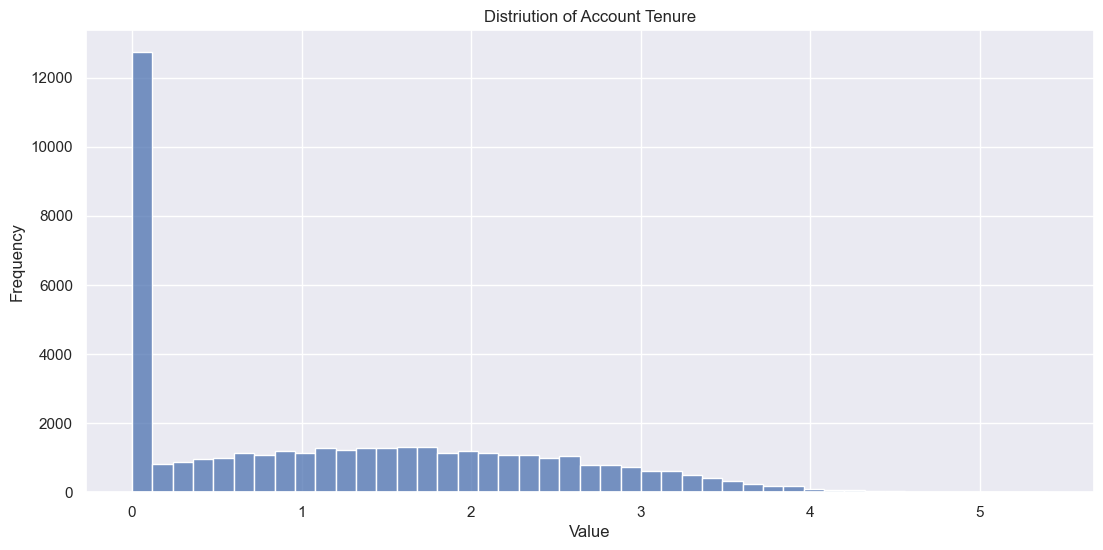

In [429]:
sns.histplot(data=df_log, x="Account_Tenure")
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distriution of Account Tenure')
plt.show()

<Axes: xlabel='Account_Tenure'>

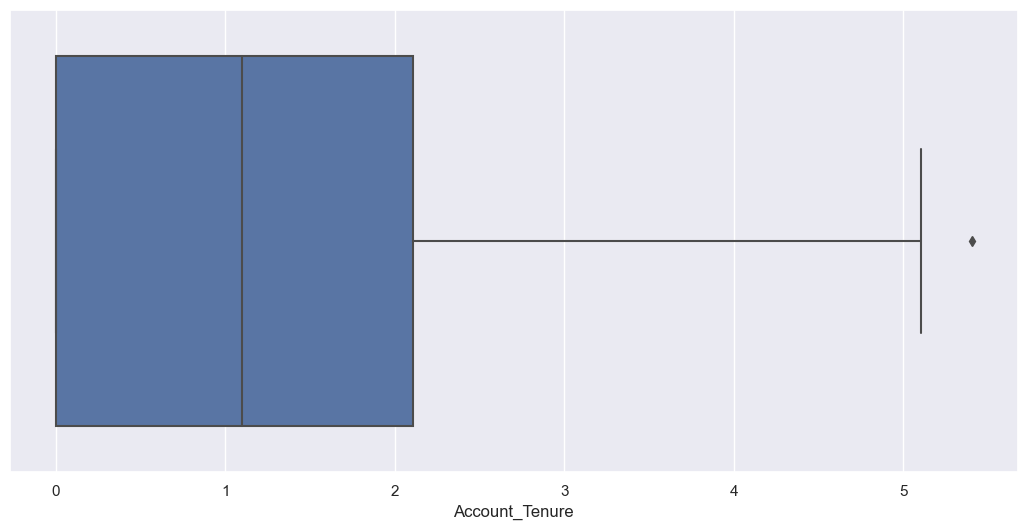

In [430]:
sns.boxplot(x= df_log["Account_Tenure"])
plt.show()

In [431]:
df_log.describe()

,pct_tl_open_L6M,pct_tl_closed_L6M,Tot_TL_closed_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,CC_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL,time_since_recent_payment,max_recent_level_of_deliq,num_deliq_6_12mts,num_times_60p_dpd,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_12mts,num_lss,recent_level_of_deliq,CC_enq_L12m,PL_enq_L12m,time_since_recent_enq,enq_L3m,NETMONTHLYINCOME,Time_With_Curr_Empr,CC_Flag,PL_Flag,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,Account_Tenure
count,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000
mean,0.141518,0.079089,0.409925,0.128379,0.283970,0.085594,0.046317,0.176580,0.897861,0.891790,0.472579,3.466866,2.237095,4.614767,1.058795,0.153770,0.137263,0.652067,0.019630,0.001087,0.003802,0.005636,0.001316,0.003794,1.001018,0.126709,0.357531,4.084610,0.561419,10.057244,4.501823,0.071368,0.133821,0.140830,0.046672,0.174836,0.039219,1.229771
std,0.205980,0.158253,0.554741,0.192290,0.466454,0.268472,0.197713,0.393089,0.836919,0.747168,0.641306,0.932497,0.912351,1.061760,1.617583,0.422999,0.472121,1.090373,0.189025,0.036514,0.073733,0.111992,0.050204,0.091805,1.540077,0.374403,0.566958,2.021219,0.634806,0.684609,0.665641,0.210656,0.273590,0.259132,0.160560,0.301034,0.160146,1.140103
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.098612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.708050,1.609438,3.951244,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.302585,0.000000,9.798183,4.127134,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147,0.000000,3.555348,2.079442,4.276666,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.382027,0.693147,10.085851,4.532599,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.098612
75%,0.287432,0.095310,0.693147,0.223144,0.693147,0.000000,0.000000,0.000000,1.386294,1.386294,0.693147,4.189655,2.833213,4.990433,2.772589,0.000000,0.000000,1.386294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.484907,0.000000,0.693147,5.713733,1.098612,10.341775,4.882802,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000,2.106841
max,0.693147,0.693147,3.526361,0.693147,3.555348,3.332205,2.397895,3.401197,5.463832,4.025352,4.394449,5.955837,5.886104,8.710455,6.803505,3.044522,3.970292,4.812184,3.737670,1.791759,2.564949,3.583519,2.564949,4.290459,6.803505,3.218876,3.806662,8.469892,3.761200,14.731802,6.928538,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,5.402677


In [432]:
df_cat = df.select_dtypes(exclude=['number'])

In [433]:
df_cat.head()

df_log.shape

,MARITALSTATUS,EDUCATION,GENDER,last_prod_enq2,first_prod_enq2,Approved_Flag,Approved_Flag
0,Married,12TH,M,PL,PL,P2,P2
1,Single,GRADUATE,F,ConsumerLoan,ConsumerLoan,P2,P2
2,Married,SSC,M,ConsumerLoan,others,P2,P2
3,Married,POST-GRADUATE,M,AL,AL,P1,P1
4,Married,12TH,M,ConsumerLoan,PL,P3,P3


(42064, 38)

In [434]:
df_loan = pd.concat([df_num, df_cat], axis=1)

In [435]:
df_loan.head()

,pct_tl_open_L6M,pct_tl_closed_L6M,Tot_TL_closed_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,CC_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL,time_since_recent_payment,max_recent_level_of_deliq,num_deliq_6_12mts,num_times_60p_dpd,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_12mts,num_lss,recent_level_of_deliq,CC_enq_L12m,PL_enq_L12m,time_since_recent_enq,enq_L3m,NETMONTHLYINCOME,Time_With_Curr_Empr,CC_Flag,PL_Flag,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,MARITALSTATUS,EDUCATION,GENDER,last_prod_enq2,first_prod_enq2,Approved_Flag,Approved_Flag
0,0.000,0.0,0,0.000,0,0,0,4,1,4,0,72,18,549,29,0,0,11,0,0,0,0,0,0,29,0,0,566,0,51000,114,0,1,0.000,0.0,1,0,Married,12TH,M,PL,PL,P2,P2
1,0.000,0.0,0,0.000,0,0,0,0,0,1,0,7,7,47,0,0,0,0,0,0,0,0,0,0,0,0,0,209,0,19000,50,0,0,0.000,0.0,0,0,Single,GRADUATE,F,ConsumerLoan,ConsumerLoan,P2,P2
2,0.125,0.0,0,0.000,1,0,0,0,2,6,0,47,2,302,25,8,0,10,0,0,0,0,0,0,25,0,0,587,0,18,191,0,0,0.000,0.0,1,0,Married,SSC,M,ConsumerLoan,others,P2,P2
3,0.000,0.0,0,0.000,0,0,0,0,3,0,2,131,32,583,0,0,0,16,0,0,0,0,0,0,0,0,0,3951,0,15000,75,0,0,0.000,0.0,0,0,Married,POST-GRADUATE,M,AL,AL,P1,P1
4,0.000,0.0,1,0.167,0,0,0,0,6,0,0,150,17,245,270,0,11,2,3,0,1,0,0,0,26,1,3,7,4,0,154,0,0,0.429,0.0,1,0,Married,12TH,M,ConsumerLoan,PL,P3,P3


In [436]:
# Remove duplicated columns
df_loan = df_loan.loc[:, ~df_loan.columns.duplicated()]

## Encoding Categorical Variables

In [437]:
df_loan.select_dtypes(exclude= 'number').columns.to_list()

['MARITALSTATUS',
 'EDUCATION',
 'GENDER',
 'last_prod_enq2',
 'first_prod_enq2',
 'Approved_Flag']

In [438]:
df_loan['MARITALSTATUS'].unique()    
df_loan['EDUCATION'].unique()
df_loan['GENDER'].unique()
df_loan['last_prod_enq2'].unique()
df_loan['first_prod_enq2'].unique()

array(['Married', 'Single'], dtype=object)

array(['12TH', 'GRADUATE', 'SSC', 'POST-GRADUATE', 'UNDER GRADUATE',
       'OTHERS', 'PROFESSIONAL'], dtype=object)

array(['M', 'F'], dtype=object)

array(['PL', 'ConsumerLoan', 'AL', 'CC', 'others', 'HL'], dtype=object)

array(['PL', 'ConsumerLoan', 'others', 'AL', 'HL', 'CC'], dtype=object)

In [439]:
education_mapping = {
    'SSC': 1,
    'OTHERS':1,
    '12TH': 2,
    'UNDER GRADUATE': 3,
    'GRADUATE': 4,
    'POST-GRADUATE':5,
    'PROFESSIONAL': 6
}

df_loan['education_encoded'] = df_loan['EDUCATION'].map(education_mapping)


In [440]:
df_loan.head()

,pct_tl_open_L6M,pct_tl_closed_L6M,Tot_TL_closed_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,CC_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL,time_since_recent_payment,max_recent_level_of_deliq,num_deliq_6_12mts,num_times_60p_dpd,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_12mts,num_lss,recent_level_of_deliq,CC_enq_L12m,PL_enq_L12m,time_since_recent_enq,enq_L3m,NETMONTHLYINCOME,Time_With_Curr_Empr,CC_Flag,PL_Flag,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,MARITALSTATUS,EDUCATION,GENDER,last_prod_enq2,first_prod_enq2,Approved_Flag,education_encoded
0,0.000,0.0,0,0.000,0,0,0,4,1,4,0,72,18,549,29,0,0,11,0,0,0,0,0,0,29,0,0,566,0,51000,114,0,1,0.000,0.0,1,0,Married,12TH,M,PL,PL,P2,2
1,0.000,0.0,0,0.000,0,0,0,0,0,1,0,7,7,47,0,0,0,0,0,0,0,0,0,0,0,0,0,209,0,19000,50,0,0,0.000,0.0,0,0,Single,GRADUATE,F,ConsumerLoan,ConsumerLoan,P2,4
2,0.125,0.0,0,0.000,1,0,0,0,2,6,0,47,2,302,25,8,0,10,0,0,0,0,0,0,25,0,0,587,0,18,191,0,0,0.000,0.0,1,0,Married,SSC,M,ConsumerLoan,others,P2,1
3,0.000,0.0,0,0.000,0,0,0,0,3,0,2,131,32,583,0,0,0,16,0,0,0,0,0,0,0,0,0,3951,0,15000,75,0,0,0.000,0.0,0,0,Married,POST-GRADUATE,M,AL,AL,P1,5
4,0.000,0.0,1,0.167,0,0,0,0,6,0,0,150,17,245,270,0,11,2,3,0,1,0,0,0,26,1,3,7,4,0,154,0,0,0.429,0.0,1,0,Married,12TH,M,ConsumerLoan,PL,P3,2


In [448]:
len(df_loan.columns)

44

In [441]:
df_encoded = pd.get_dummies(df_loan, columns=['MARITALSTATUS','GENDER', 'last_prod_enq2' ,'first_prod_enq2'])

In [447]:
df_encoded.head()

,pct_tl_open_L6M,pct_tl_closed_L6M,Tot_TL_closed_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,CC_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL,time_since_recent_payment,max_recent_level_of_deliq,num_deliq_6_12mts,num_times_60p_dpd,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_12mts,num_lss,recent_level_of_deliq,CC_enq_L12m,PL_enq_L12m,time_since_recent_enq,enq_L3m,NETMONTHLYINCOME,Time_With_Curr_Empr,CC_Flag,PL_Flag,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,EDUCATION,Approved_Flag,education_encoded,MARITALSTATUS_Married,MARITALSTATUS_Single,GENDER_F,GENDER_M,last_prod_enq2_AL,last_prod_enq2_CC,last_prod_enq2_ConsumerLoan,last_prod_enq2_HL,last_prod_enq2_PL,last_prod_enq2_others,first_prod_enq2_AL,first_prod_enq2_CC,first_prod_enq2_ConsumerLoan,first_prod_enq2_HL,first_prod_enq2_PL,first_prod_enq2_others
0,0.000,0.0,0,0.000,0,0,0,4,1,4,0,72,18,549,29,0,0,11,0,0,0,0,0,0,29,0,0,566,0,51000,114,0,1,0.000,0.0,1,0,12TH,P2,2,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
1,0.000,0.0,0,0.000,0,0,0,0,0,1,0,7,7,47,0,0,0,0,0,0,0,0,0,0,0,0,0,209,0,19000,50,0,0,0.000,0.0,0,0,GRADUATE,P2,4,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0
2,0.125,0.0,0,0.000,1,0,0,0,2,6,0,47,2,302,25,8,0,10,0,0,0,0,0,0,25,0,0,587,0,18,191,0,0,0.000,0.0,1,0,SSC,P2,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
3,0.000,0.0,0,0.000,0,0,0,0,3,0,2,131,32,583,0,0,0,16,0,0,0,0,0,0,0,0,0,3951,0,15000,75,0,0,0.000,0.0,0,0,POST-GRADUATE,P1,5,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0
4,0.000,0.0,1,0.167,0,0,0,0,6,0,0,150,17,245,270,0,11,2,3,0,1,0,0,0,26,1,3,7,4,0,154,0,0,0.429,0.0,1,0,12TH,P3,2,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0


In [452]:
df_encoded= df_encoded.drop(['EDUCATION'], axis= 1)

## Model Building

In [455]:
# 1. Random Forest
# 1. Random Forest

y = df_encoded['Approved_Flag']
x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators = 200, random_state=42)
rf_classifier.fit(x_train, y_train)
y_pred = rf_classifier.predict(x_test)



accuracy = accuracy_score(y_test, y_pred)
print ()
print(f'Accuracy: {accuracy}')
print ()
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)


for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()


RandomForestClassifier(n_estimators=200, random_state=42)


Accuracy: 0.7653631284916201

Class p1:
Precision: 0.8402860548271752
Recall: 0.6952662721893491
F1 Score: 0.7609282245008094

Class p2:
Precision: 0.7957734573119188
Recall: 0.9330029732408325
F1 Score: 0.858941605839416

Class p3:
Precision: 0.44145569620253167
Recall: 0.21056603773584906
F1 Score: 0.28513030148186

Class p4:
Precision: 0.7283349561830574
Recall: 0.7269193391642371
F1 Score: 0.7276264591439687



In [457]:
# 2. xgboost

import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

xgb_classifier = xgb.XGBClassifier(objective='multi:softmax',  num_class=4)



y = df_encoded['Approved_Flag']
x = df_encoded. drop (['Approved_Flag'], axis = 1 )


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)




xgb_classifier.fit(x_train, y_train)
y_pred = xgb_classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print ()
print(f'Accuracy: {accuracy:.2f}')
print ()

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=4,
              num_parallel_tree=None, ...)


Accuracy: 0.77

Class p1:
Precision: 0.8160427807486631
Recall: 0.752465483234714
F1 Score: 0.7829656233966136

Class p2:
Precision: 0.8213775874375446
Recall: 0.912388503468781
F1 Score: 0.8644943187153723

Class p3:
Precision: 0.46327014218009477
Recall: 0.29509433962264153
F1 Score: 0.36053480866758875

Class p4:
Precision: 0.7359223300970874
Recall: 0.7366375121477162
F1 Score: 0.7362797474502186

